In [1]:
# Dependencias - EJECUTA ESTA CELDA ANTES DE COMENZAR

# El paquete nnfs incluye la base de datos de entrenamiento que vamos a usar, y asegura que las semillas de los métodos random son consistentes, para que nuestros resultados sean comparables
%pip install -q nnfs
%pip install -q numpy matplotlib

import nnfs
import matplotlib.pyplot as plt
import numpy as np

nnfs.init()

# Esta función la usaremos más adelante para ver los resultados de la red
# works only for model = model = [dense1, activation1, dense2, loss_activation]

def plot_prediction_performance_spiral(
        model: list | tuple,
        X, y,
        num_points: int = 100,
        ) -> None:
    """Plots the performance of the model in the spiral dataset with 3 categories"""

    def probabilities_to_rgb(probabilities_array):
        """ Maps an array of probabilities to RGB colors."""

        # Ensure that probabilities sum up to 1 for all data points
        if not np.all(np.isclose(np.sum(probabilities_array, axis=1), 1.0)):
            raise ValueError("Probabilities must sum up to 1 for all data points.")

        # Map probabilities to RGB channels (0-255) for all data points
        r, g, b = (probabilities_array * 255).astype(int).T

        # Return the RGB colors as a NumPy array
        return np.column_stack((r, g, b))

    # Create a meshgrid of points in the (-1,1)x(-1,1) space
    x_val = np.linspace(-1, 1, num_points)
    y_val = np.linspace(-1, 1, num_points)

    x_grid, y_grid = np.meshgrid(x_val, y_val)

    # Flatten the grids into 1D arrays
    x_flat = x_grid.flatten()
    y_flat = y_grid.flatten()

    # Combine the flattened arrays into an Nx2 array
    XX_tuples = np.column_stack((x_flat, y_flat))

    # Perform a forward pass through the network
    input = XX_tuples
    for layer in model[:-1]:
        layer.forward(input)
        input = layer.output

    # Assumed last layer is a softmax activation + loss function
    # 'y_true' here is random since it will not be used
    # (only the output of the softmax is needed)
    model[-1].forward(input, y_true=np.array([0]*len(model[-2].output)))

    probabilities_array = model[-1].output
    rgb_colors = probabilities_to_rgb(probabilities_array)
    probs_2d = rgb_colors.reshape(num_points, num_points,3)

    # Assumed 3 categories - change this if different
    colors = ['r' if label == 0 else 'g' if label == 1 else 'b' for label in y]

    plt.imshow(probs_2d, extent=(-1, 1, -1, 1), interpolation='bilinear')
    plt.scatter(X[:, 0], -X[:, 1], c = colors)
    #plt.axis('off')  # Turn off axis labels and ticks
    plt.show()# print(rgb_colors)  # This will print the RGB color array
    # plt.pcolor(xx, yy, rgb_colors)
    # plt.show()


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Ejercicio 1: Una neurona simple

<center>
<div>
<img src="https://drive.upm.es/index.php/apps/files_sharing/ajax/publicpreview.php?x=1920&y=457&a=true&file=neurona_simple.png&t=04gzB6Klm7RQkH6&scalingup=0" width="250"/>
</div>
</center>

Calcula el output de una neurona simple con cuatro inputs: $[1.0, 2.0, 3.0, 2.5]$, donde los correspondientes pesos son $[0.2, 0.8, -0.5, 1.0]$, y el sesgo es $2.0$.

In [58]:
# SOL EJ 1
inputs = [1.0, 2.0, 3.0, 2.5]
w = [0.2, 0.8, -0.5, 1.0]
bias = 2.0
x = 0

for i in range(0, len(inputs)):
    x += inputs[i] * w[i]

print(x+bias)

4.8


## Ejercicio 2: Una capa de neuronas

<center>
<div>
<img src="https://drive.upm.es/index.php/apps/files_sharing/ajax/publicpreview.php?x=1920&y=457&a=true&file=capa_neuronas_simple.png&t=IvPdbEiQJ9gFVxo&scalingup=0" width="250"/>
</div>
</center>

Calcula la salida de una capa de neuronas con cuatro entradas ($[1, 2, 3, 2.5]$) y tres neuronas:
 - Neurona 1: Pesos = $[0.2, 0.8, -0.5, 1]$, Sesgo = $2$
 - Neurona 2: Pesos = $[0.5, -0.91, 0.26, -0.5]$, Sesgo = $3$
 - Neurona 3: Pesos = $[-0.26, -0.27, 0.17, 0.87]$, Sesgo = $0.5$
  
Calcula la salida directamente sobre una lista, calculando para cada elemento las operaciones necesarias entre inputs, pesos y sesgos.


In [59]:
# SOL EJ 2
inputs = [1.0, 2.0, 3.0, 2.5]

weights = [
    [0.2, 0.8, -0.5, 1],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
]

biases = [2, 3, 0.5]

output = [
    #Neurona 1
    inputs[0] * weights[0][0] + inputs[1] * weights[0][1] + inputs[2] * weights[0][2] + inputs[3] * weights[0][3] + biases[0],
    #Neurona 2
    inputs[0] * weights[1][0] + inputs[1] * weights[1][1] + inputs[2] * weights[1][2] + inputs[3] * weights[1][3] + biases[1],
    #Neurona 3
    inputs[0] * weights[2][0] + inputs[1] * weights[2][1] + inputs[2] * weights[2][2] + inputs[3] * weights[2][3] + biases[2]
]

output

[4.8, 1.21, 2.385]

# Ejercicio 3: Una capa de neuronas - generalización

Repite el ejercicio 2, pero utiliza un enfoque más general que permita realizar las mismas operaciones por neuronas de forma secuencial (utiliza un bucle ```for```). El formato de datos de entrada ahora es el siguiente:

In [60]:
inputs = [1, 2, 3, 2.5]
weights = [
    [0.2, 0.8, -0.5, 1],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
]
biases = [2, 3, 0.5]

In [61]:
# SOL EJ 3
layer_outputs = []

for neuron_w, neuron_bias in zip(weights, biases):
    neuron_output = 0
    for input, weight in zip(inputs, neuron_w):
        neuron_output += input * weight

    layer_outputs.append(neuron_output + neuron_bias)

layer_outputs

[4.8, 1.21, 2.385]

# Ejercicio 4: Prueba de eficiencia

Copia tu solución anterior, pero ahora utiliza un tamaño creciente de los datos de entrada: $n = [5, 50, 500, 5000]$. Genera listas del tamaño apropiado para los inputs, pesos y sesgos que contengan números aleatorios entre $1$ y $3$ para las entradas y sesgos y entre $-1$ y $1$ para los pesos. Supón distribuciones uniformes. Observa el rendimiento de tu implementación cuando $n$ crece.

In [62]:
# SOL EJ 4
import numpy as np

xd = {}

for n in [5, 50, 500, 5000]:
    inputs = np.random.uniform(1, 3, size=(n,))
    weights = np.random.uniform(-1, 1, size=(n,))
    bias = np.random.uniform(1, 3, size=(n,))

    xd[n] = {"inputs" : inputs, "w":  weights, "b": bias}


## Ejercicio 5: Una neurona simple usando ```numpy```

Reimplementa el ejercicio 1 usando el paquete ```numpy```


In [63]:
# SOL EJ 5
# SOL EJ 1
inputs = np.array([1.0, 2.0, 3.0, 2.5])
w = np.array([0.2, 0.8, -0.5, 1.0])
bias = 2.0

print(np.dot(inputs, w) + bias)

4.799999952316284


## Ejercicio 6: Una capa de neuronas usando ```numpy```

Reimplementa el ejercicio 2 usando el paquete ```numpy```.


In [64]:
import numpy as np

inputs = np.array([1.0, 2.0, 3.0, 2.5])
weights = np.array([[0.2, 0.8, -0.5, 1],
                    [0.5, -0.91, 0.26, -0.5],
                    [-0.26, -0.27, 0.17, 0.87]])

biases = np.array([2.0, 3.0, 0.5])

In [65]:
#SOL EJ 6
layer_outputs = []

for neuron_w, neuron_bias in zip(weights, biases):
    neuron_output = 0
    layer_outputs.append(np.dot(inputs, neuron_w) + neuron_bias)

layer_outputs

[4.799999952316284, 1.2100000381469727, 2.384999990463257]

## Ejercicio 7: Una capa de neuronas con datos en *batch*

Implementa el *forward pass* de una neurona simple asumiendo que la entrada son datos en lote (*batch*). Es decir, la entrada ahora será una matriz, donde cada fila corresponderá a una observación. Por tanto, la salida también será de dimensión 2. Considera los datos dados a continuación:

In [66]:
import numpy as np

inputs = np.array([[1.0, 2.0, 3.0, 2.5],
            [2.0, 5.0, -1.0, 2.0],
            [-1.5, 2.7, 3.3, -0.8]])
weights = np.array([[0.2, 0.8, -0.5, 1.0],
         [0.5, -0.91, 0.26, -0.5],
         [-0.26, -0.27, 0.17, 0.87]])
bias = np.array([2.0, 3.0, 0.5])

In [67]:
# SOL EJ 7
layer_outputs = []

for input in inputs:
    neuron_output = 0
    for neuron_w, neuron_bias in zip(weights, biases):
        layer_outputs.append(np.dot(input, neuron_w) + neuron_bias)

print(layer_outputs)

## Otra forma
print(np.dot(inputs, weights.T) + bias)

[4.799999952316284, 1.2100000381469727, 2.384999990463257, 8.900000095367432, -1.809999942779541, 0.19999998807907104, 1.4100000262260437, 1.0509999990463257, 0.025999993085861206]
[[ 4.79999995  1.21000004  2.38499999]
 [ 8.9000001  -1.80999994  0.19999999]
 [ 1.41000003  1.051       0.02599999]]


## Ejercicio 8: Red neuronal con una *hidden layer*

Implementa el *forward pass* de una red con la siguiente arquitectura: una capa de entrada (4 inputs), una hidden layer de 3 neuronas y una capa de salida también con 3 neuronas. Utiliza los datos dados a continuación:

<center>
<div>
<img src="https://drive.upm.es/index.php/apps/files_sharing/ajax/publicpreview.php?x=1920&y=457&a=true&file=red_simple.png&t=IkHbjPoTjUPoGWt&scalingup=0" width="250"/>
</div>
</center>



In [68]:
import numpy as np

inputs = np.array([
    [1, 2, 3, 2.5],
    [2, 5, -1, 2],
    [-1.5, 2.7, 3.3, -0.8]
])

weights = np.array([
    [0.2, 0.8, -0.5, 1],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
])

biases = np.array([2, 3, 0.5])

weights2 = np.array([
    [0.1, -0.14, 0.5],
    [-0.5, 0.12, -0.33],
    [-0.44, 0.73, -0.13]
])

biases2 = np.array([-1, 2, -0.5])

In [69]:
# SOL EJ 8
capa1 = np.dot(inputs, weights.T) + biases
capa2 = np.dot(capa1, weights2.T) + biases2
capa2

array([[ 0.50310004, -1.04184985, -2.03874993],
       [ 0.24339998, -2.73320007, -5.76329994],
       [-0.99314   ,  1.41254002, -0.35655001]])

## Ejercicio 9: Capa de neuronas usando Programación Orientada a Objetos

Crea una clase llamada ```Layer_Dense```, cuyos parámetros de entrada sean ```n_inputs``` (número de inputs a la capa) y ```n_neurons``` (número de neuronas que contiene la capa). Además, en su constructor deben inicializarse dos variables:
 - ```self.weights```: una matriz que contenga los pesos. Deben inicializarse en números aleatorios entre 0 y 0.01.
 - ```self.biases```: un vector columna que contenga los sesgos. Deben inicializarse en $0$.

Implementa un único método llamado ```forward(self, inputs)``` que, dados unos inputs a la capa, realice el *forward pass*. El resultado debe almacenarse en una variable de la propia clase ```self.output```.

In [70]:
#SOL EJ 9
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = np.random.uniform(0, 0.01, (n_inputs, n_neurons))
        self.biases = np.zeros((1, n_neurons))
        self.output = 0

    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

n_inputs = 10
n_neuronas = 3
n_capas = 2
input = np.random.uniform(0, 10, n_inputs)
denses = [Layer_Dense(n_inputs, n_neuronas)]

for _ in range(n_capas):
    denses.append(Layer_Dense(n_neuronas, n_neuronas - 1))
    n_neuronas -= 1

denses[0].forward(input)
for i in range(1, len(denses)):
    denses[i].forward(denses[i-1].output)

print(denses[len(denses)-1].output)

[[3.947637e-05]]


## Ejercicio 10: *Forward pass* de datos de entrenamiento — Triple espiral

A continuación se describe un problema de clasificación con tres categorías. La base de datos mostrada abajo ha sido generada a partir de la ecuación de 3 espirales distintas, añadiendo ruido. Se trata de un problema complejo por su alta no-linealidad. Observa toda la base de datos:

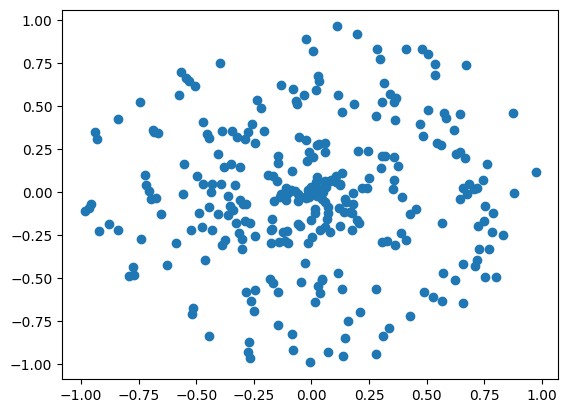

In [71]:
import matplotlib.pyplot as plt
from nnfs.datasets import spiral_data

X, y = spiral_data(samples=100, classes=3)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

Resaltando por colores cada categoría se aprecia mejor su naturaleza:

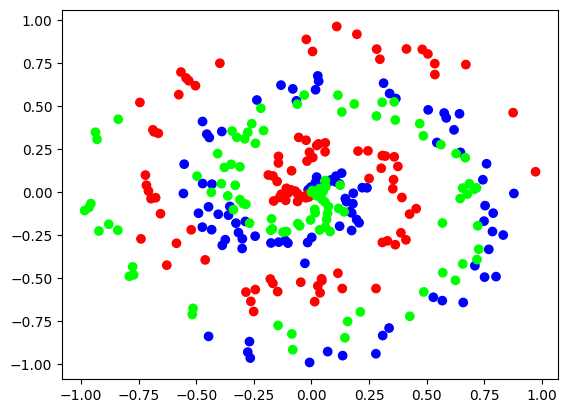

In [72]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()

Realiza un *forward pass* de los datos de entrada ```X``` en la red definida en el ejercicio anterior.

In [73]:
# SOL EJ 10

import nnfs
import numpy as np

# Set seed for reproducibility. Keep this!
nnfs.init()

dense1 = Layer_Dense(2, 3)
dense1.forward(X)

print(dense1.output.shape)

(300, 3)


## Ejercicio 11: Función de activación ReLU

Programa una clase llamada ```Activation_ReLU``` que implemente únicamente un método ```forward(self, inputs)```. Dicho método debe aplicar la función de activación ReLU a los inputs pasados como argumento.

<center>
<div>
<img src="https://drive.upm.es/index.php/apps/files_sharing/ajax/publicpreview.php?x=1920&y=457&a=true&file=relu.png&t=reweQCjpTXGOQZ4&scalingup=0" width="350"/>
</div>
</center>


In [74]:
# SOL EJ 11
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

## Ejercicio 12: Función de activación ```Softmax```
El objetivo de este ejercicio es llegar a una clase llamada ```Activation_Softmax``` que implemente únicamente un método ```forward(self, inputs)```. Dicho método debe aplicar la función de activación Softmax a los inputs pasados como argumento. En teoría la función Softmax se formula como

$$
S_{i, j}=\frac{e^{z_{i, j}}}{\sum_{l=1}^L e^{z_{i, l}}}
$$
siendo los $z_j$ el output de la neurona $j$ (y por tanto, input de la función de activación). El índice $i$ hace referencia a la observación $i$ considerada.

Para conseguir una implementación robusta, haremos alguna modificación en la formulación anterior. Siguie el siguiente proceso:


 - **12.a** Dada una única observación ```layer_outputs = [4.8, 1.21, 2.385]``` (se supone salida de una capa), aplica la función Softmax anterior (de momento, no es necesario que programes ninguna clase).

In [75]:
# SOL EJ 12a
layer_outputs = np.array([4.8, 1.21, 2.385])
soft_output = np.exp(layer_outputs) / np.sum(np.exp(layer_outputs))

soft_output

array([0.89528266, 0.02470831, 0.08000903])

 - **12.b** Dados los siguientes datos en lote, aplica la función Softmax a cada observación.

In [76]:
layer_outputs = np.array([[4.8, 1.21, 2.385],
                            [8.9, -1.81, 0.2],
                            [1.41, 1.051, 0.026]])

In [77]:
# SOL EJ 12b
soft_output = np.exp(layer_outputs) / np.sum(np.exp(layer_outputs), axis=1, keepdims=True)
soft_output

array([[8.95282664e-01, 2.47083068e-02, 8.00090293e-02],
       [9.99811129e-01, 2.23163963e-05, 1.66554348e-04],
       [5.13097164e-01, 3.58333899e-01, 1.28568936e-01]])

 - **12.c** En el proceso de exponenciación anterior, resta al input considerado el máximo valor de dicha observación. Esto pretende evitar que los valores se disparen al exponenciar (*exloding values*).


In [78]:
# SOL EJ 12c

 - **12.d** Encapsula el código anterior en una clase ```Activation_Softmax``` que implemente únicamente un método: ```forward(self, inputs)```

In [79]:
# SOL EJ 12d
class Activation_Softmax:
    def forward(self, inputs):
        # En la práctica funciona mejor si restas el valor maximo
        self.output = np.exp(inputs - np.max(inputs, axis=1, keepdims=True)) / np.sum(np.exp(inputs), axis=1, keepdims=True)

## Ejercicio 13: *Forward pass* de una red con funciones de activación

Dado un conjunto de datos de entrada $X$, construye una red neuronal que conste de dos capas densas y funciones de activación ReLU y Softmax. El objetivo es realizar un *forward pass* a través de esta red. Los datos de entrada corresponde con los presentados en el ejercicio 10:

In [80]:
from nnfs.datasets import spiral_data

X, y = spiral_data(samples=100, classes=3)

La arquitectura de la red debe ser:
 - Input de dos features (las coordenadas de los puntos)
 - Hidden layer, con entrada de 2 valores y salida de 3. Función de activación ReLU.
 - Capa de salida, con entrada de 3 valores y salida también de 3 valores (correspondientes a las tres categorías del problema de clasificación). Función de activación Softmax.

Realiza un forward pass de los datos hasta la última función (softmax) e imprime por pantalla el output para las 5 primeras observaciones. Reutiliza las clases implementadas en ejercicios anteriores.

In [81]:
# SOL EJ 13

# capa 1
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()

# capa 2
dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)

print(activation2.output[:5])

[[0.33333334 0.33333334 0.33333334]
 [0.33333316 0.3333332  0.3333331 ]
 [0.33333296 0.33333308 0.3333329 ]
 [0.33333254 0.33333266 0.3333323 ]
 [0.33333236 0.33333248 0.33333203]]


## Ejercicio 14: Función de pérdidas — entropía cruzada. Caso particular

Imagina que estamos tratando de clasificar entre las categorías "perro", "gato" o "humano". Un perro es la clase 0 (en el índice 0), un gato la clase 1 (índice 1) y un humano la clase 2 (índice 2). Supongamos que tenemos una arquitectura como la del ejercicio anterior y que tenemos un batch de tres observaciones, que han dado lugar a los siguientes valores de salida en la última capa:

In [82]:
softmax_outputs = np.array(
    [[0.7, 0.1, 0.2],
    [0.1, 0.5, 0.4],
    [0.02, 0.9, 0.08]]
)

Recuerda que estos valroes representan la confianza del modelo en cada clase, para cada observación. Disponemos también de las etiquetas (valores objetivo) para estas tres observaciones: son un perro, un gato y un gato:

In [83]:
class_targets = [0, 1, 1] # perro, gato, gato

La fórmula para calcular la entropía cruzada categórica de *y* (distribución real/deseada) e *y-hat* (distribución predicha) es:
$$
L_i=-\sum_j y_{i, j} \log \left(\hat{y}_{i, j}\right)
$$
donde $L_i$ indica el valor de pérdida de la muestra, $i$ es la muestra $i$-ésima del conjunto, $j$ es la hace referencia al valor $j$-ésimo en la salida, $y$ son los valores objetivo (conocidos de antemano) e $\hat{y}$ son los valores predichos (salida de la red).

Calcula la entropía cruzada categórica para cada observación del batch anterior, así como una media para todo el batch.

In [84]:
# SOL EJ 14

"""
# forma poco genérica
for targ_idx, distribution in zip(class_targets, softmax_outputs):
  print(distribution[targ_idx])

# otra forma menos genérica
print(softmax_outputs[[0, 1, 2], class_targets])
"""

# otra forma más genérica
print(softmax_outputs[[range(len(softmax_outputs))], class_targets])

[[0.7 0.5 0.9]]


## Ejercicio 15: Función de pérdidas — entropía cruzada usando POO

Observa la siguiente clase abstracta:

In [85]:
from abc import ABC, abstractmethod
import numpy as np

class Loss(ABC):

    @abstractmethod
    def forward(self, output, y):
        pass

    def calculate(self, output, y):
        """
        Return sample losses (mean)
         - output: output of the last layer of the network
         - y: ground truth
        """
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss

 - **15.a** A partir del ejercicio 14, implementa una clase llamada ```Loss_CategoricalCrossentropy``` que herede de la clase abstracta anterior e implemente el método ```forward```, para el caso de una función de pérdida tipo entropía cruzada categórica.

In [86]:
# SOL EJ 15a
class Loss_CategoricalCrossentropy(Loss):
    def forward(self, output, y):
        sample = len(output)

        # with `clip` we can set values on the desire range
        # thus, values < 1e-7 become 1e-7 and values > 1 - 1e7
        # becomes 1 - 1e7

        # This way we eliminate the consecuence of getting a 0
        y_pred_clipped = np.clip(output, 1e-7, 1 - 1e-7)
        correct_confidences = y_pred_clipped[[range(sample)], y]

        negative_log_probs = -np.log(correct_confidences)

        return negative_log_probs

 - **15.b** Repite el *forward pass* del ejercicio 13, pero incluye el cálculo final de la función de pérdidas usando la implementación anterior

In [87]:
# SOL EJ 15b
from nnfs.datasets import spiral_data

X, y = spiral_data(samples=100, classes=3)

# capa 1
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()

# capa 2
dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)

categorical_entropy1 = Loss_CategoricalCrossentropy()
loss = categorical_entropy1.calculate(activation2.output, y)

print("Pérdida:", loss)

Pérdida: 1.0986327


 - **15.c** Aunque la pérdida es una métrica útil para optimizar un modelo, hay otra métrica que se suele utilizar en la práctica junto con la pérdida: la *precisión*, que describe con qué frecuencia la mayor confianza corresponde a la clase correcta. Añade al código del apartado 'b' el cálculo de la precisión.

In [88]:
predictions = np.argmax(activation2.output, axis=1)
accuracy = np.mean(predictions == y)

print("Precisión:", accuracy)

Precisión: 0.3


## Ejercicio 16: Optimización — modificación aleatoria de pesos (I)

Observa los siguientes datos de entrenamiento, que también definen un problema de clasificación multiclase, pero de una naturaleza más sencilla que el de la triple espiral visto hasta ahora

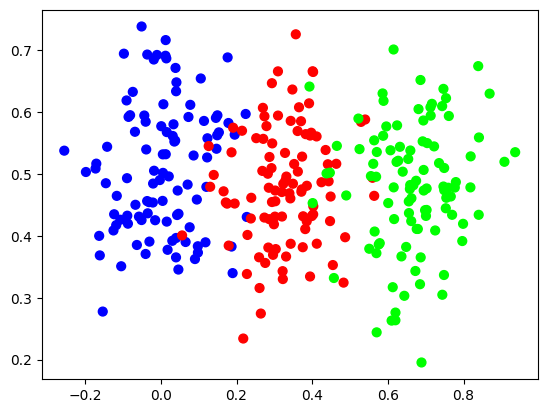

In [89]:
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import vertical_data

nnfs.init()

X, y = vertical_data(samples=100, classes=3)

plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
plt.show()



Utilizando la estructura computacional del ejercicio anterior, realiza un proceso iterativo (máximo 10000 iteraciones) en el que se vayan cambiando los pesos y sesgos de ambas capas de forma aleatoria (distribución normal de media 0 y varianza 0.05). Almacena el resultado que dé lugar a una menor pérdida. Comenta el decrecimiento de la función de pérdidas durante el proceso.

In [90]:
# SOL EJ 16

nnfs.init()

minor_losses = {}

# Define la estructura de la red neuronal
dense1 = Layer_Dense(n_inputs=2, n_neurons=3)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(n_inputs=3, n_neurons=3)
activation2 = Activation_Softmax()
categorical_crossentropy = Loss_CategoricalCrossentropy()

# Parámetros iniciales
best_loss = float("inf")
best_weights1 = dense1.weights.copy()
best_biases1 = dense1.biases.copy()
best_weights2 = dense2.weights.copy()
best_biases2 = dense2.biases.copy()

for i in range(10000):
    # Copia de los parámetros actuales
    weights1 = dense1.weights.copy()
    biases1 = dense1.biases.copy()
    weights2 = dense2.weights.copy()
    biases2 = dense2.biases.copy()

    # Modifica los parámetros aleatoriamente con distribución normal
    weights1 += np.random.normal(0, 0.05, size=weights1.shape)
    biases1 += np.random.normal(0, 0.05, size=biases1.shape)
    weights2 += np.random.normal(0, 0.05, size=weights2.shape)
    biases2 += np.random.normal(0, 0.05, size=biases2.shape)

    # Asigna los nuevos parámetros a las capas
    dense1.weights = weights1
    dense1.biases = biases1
    dense2.weights = weights2
    dense2.biases = biases2

    # Pase hacia adelante
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    # Calcula la pérdida
    loss = categorical_crossentropy.calculate(activation2.output, y)

    # Comprueba si la pérdida es menor que la mejor pérdida anterior
    if loss < best_loss:
        best_loss = loss
        best_weights1 = weights1
        best_biases1 = biases1
        best_weights2 = weights2
        best_biases2 = biases2
        minor_losses[i] = best_loss

    if i % 100 == 0:
        print(f"Iteración {i}: Pérdida = {loss}")

# Restaura los mejores parámetros
dense1.weights = best_weights1
dense1.biases = best_biases1
dense2.weights = best_weights2
dense2.biases = best_biases2

# Pase hacia adelante con los mejores parámetros
dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)

# Calcula la pérdida final y la precisión
final_loss = categorical_crossentropy.calculate(activation2.output, y)
predictions = np.argmax(activation2.output, axis=1)
accuracy = np.mean(predictions == y)

print(f"Pérdida final: {final_loss}")
print(f"Precisión final: {accuracy}")

Iteración 0: Pérdida = 1.1276713609695435
Iteración 100: Pérdida = 1.0012397766113281
Iteración 200: Pérdida = 1.538635492324829
Iteración 300: Pérdida = 1.29226815700531
Iteración 400: Pérdida = 1.3424811363220215
Iteración 500: Pérdida = 2.7483179569244385
Iteración 600: Pérdida = 1.4209039211273193
Iteración 700: Pérdida = 0.5821226835250854
Iteración 800: Pérdida = 1.2054184675216675
Iteración 900: Pérdida = 1.5173828601837158
Iteración 1000: Pérdida = 0.6922865509986877
Iteración 1100: Pérdida = 1.4059603214263916
Iteración 1200: Pérdida = 1.2993162870407104
Iteración 1300: Pérdida = 2.6706383228302
Iteración 1400: Pérdida = 1.1920930376163597e-07
Iteración 1500: Pérdida = 1.1920930376163597e-07
Iteración 1600: Pérdida = 0.011023233644664288
Iteración 1700: Pérdida = 0.23526491224765778
Iteración 1800: Pérdida = 0.00781785324215889
Iteración 1900: Pérdida = 1.1920930376163597e-07
Iteración 2000: Pérdida = 0.005161975510418415
Iteración 2100: Pérdida = 1.1920930376163597e-07
Iterac

Iteración 8100: Pérdida = 16.114641189575195
Iteración 8200: Pérdida = 16.11046028137207
Iteración 8300: Pérdida = 16.117204666137695
Iteración 8400: Pérdida = 16.115562438964844
Iteración 8500: Pérdida = 16.106250762939453
Iteración 8600: Pérdida = 16.11809539794922
Iteración 8700: Pérdida = 16.11809539794922
Iteración 8800: Pérdida = 16.11809539794922
Iteración 8900: Pérdida = 16.11809539794922
Iteración 9000: Pérdida = 16.11809539794922
Iteración 9100: Pérdida = 16.11809539794922
Iteración 9200: Pérdida = 16.11809539794922
Iteración 9300: Pérdida = 16.11809539794922
Iteración 9400: Pérdida = 16.11809539794922
Iteración 9500: Pérdida = 16.11809539794922
Iteración 9600: Pérdida = 16.11809539794922
Iteración 9700: Pérdida = 16.11809539794922
Iteración 9800: Pérdida = 16.11809539794922
Iteración 9900: Pérdida = 16.11809539794922
Pérdida final: 1.1920930376163597e-07
Precisión final: 0.3333333333333333


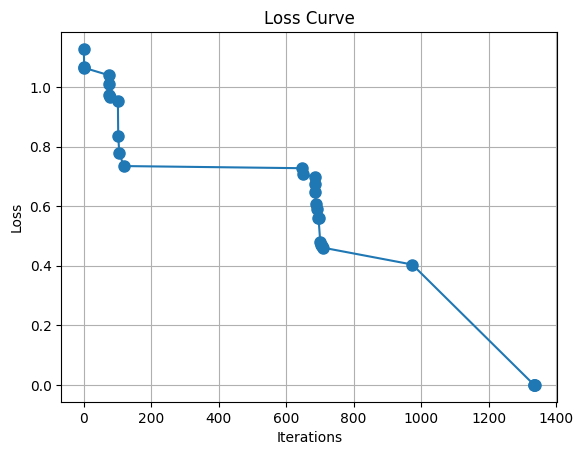

In [91]:
plt.plot(
    list(minor_losses.keys()),
    list(minor_losses.values()),
    "o-",
    markersize=8,
)
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)

# Show the plot
plt.show()

## Ejercicio 17: Optimización — modificación aleatoria de pesos (II)

 - **17.a** Repite el ejercicio anterior con un enfoque ligeramente distinto: en lugar de fijar nuevos parámetros elegios al azar en cada iteración, suma una fracción aleatoria (distribución normal de media 0 y varianza 0.05) a los parámetros actuales y comprueba si esos nuevos valores dan lugar a una pérdida menor. Comenta si este enfoque funciona mejor o peor que el anterior.


In [92]:
# SOL EJ 17a
import numpy as np
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import vertical_data

nnfs.init()

minor_losses = {}

X, y = vertical_data(samples=100, classes=3)

# Define la estructura de la red neuronal
dense1 = Layer_Dense(n_inputs=2, n_neurons=3)
relu = Activation_ReLU()
dense2 = Layer_Dense(n_inputs=3, n_neurons=3)
softmax = Activation_Softmax()
categorical_crossentropy = Loss_CategoricalCrossentropy()

# Parámetros iniciales
best_loss = float("inf")
best_weights1 = dense1.weights.copy()
best_biases1 = dense1.biases.copy()
best_weights2 = dense2.weights.copy()
best_biases2 = dense2.biases.copy()

for i in range(10000):
    # Copia de los parámetros actuales
    weights1 = dense1.weights.copy()
    biases1 = dense1.biases.copy()
    weights2 = dense2.weights.copy()
    biases2 = dense2.biases.copy()

    # Suma una fracción aleatoria a los parámetros actuales
    weights1 += np.random.normal(0, 0.05, size=weights1.shape)
    biases1 += np.random.normal(0, 0.05, size=biases1.shape)
    weights2 += np.random.normal(0, 0.05, size=weights2.shape)
    biases2 += np.random.normal(0, 0.05, size=biases2.shape)

    # Asigna los nuevos parámetros a las capas
    dense1.weights = weights1
    dense1.biases = biases1
    dense2.weights = weights2
    dense2.biases = biases2

    # Pase hacia adelante
    dense1.forward(X)
    relu.forward(dense1.output)
    dense2.forward(relu.output)
    softmax.forward(dense2.output)

    # Calcula la pérdida
    loss = categorical_crossentropy.calculate(softmax.output, y)

    # Comprueba si la pérdida es menor que la mejor pérdida anterior
    if loss < best_loss:
        best_loss = loss
        best_weights1 = weights1
        best_biases1 = biases1
        best_weights2 = weights2
        best_biases2 = biases2
        minor_losses[i] = best_loss

    if i % 100 == 0:
        print(f"Iteración {i}: Pérdida = {loss}")

# Restaura los mejores parámetros
dense1.weights = best_weights1
dense1.biases = best_biases1
dense2.weights = best_weights2
dense2.biases = best_biases2

# Pase hacia adelante con los mejores parámetros
dense1.forward(X)
relu.forward(dense1.output)
dense2.forward(relu.output)
softmax.forward(dense2.output)

# Calcula la pérdida final y la precisión
final_loss = categorical_crossentropy.calculate(softmax.output, y)
predictions = np.argmax(softmax.output, axis=1)
accuracy = np.mean(predictions == y)

print(f"Pérdida final: {final_loss}")
print(f"Precisión final: {accuracy}")

Iteración 0: Pérdida = 1.1495027542114258
Iteración 100: Pérdida = 1.883463978767395
Iteración 200: Pérdida = 2.6336233615875244


Iteración 300: Pérdida = 5.556074142456055
Iteración 400: Pérdida = 4.857905864715576
Iteración 500: Pérdida = 7.603246212005615
Iteración 600: Pérdida = 5.1508073806762695
Iteración 700: Pérdida = 3.5338473320007324
Iteración 800: Pérdida = 9.551138877868652
Iteración 900: Pérdida = 8.310670852661133
Iteración 1000: Pérdida = 10.480034828186035
Iteración 1100: Pérdida = 8.506387710571289
Iteración 1200: Pérdida = 4.251183032989502
Iteración 1300: Pérdida = 3.554462194442749
Iteración 1400: Pérdida = 7.235424995422363
Iteración 1500: Pérdida = 8.274776458740234
Iteración 1600: Pérdida = 4.579472064971924
Iteración 1700: Pérdida = 5.278890609741211
Iteración 1800: Pérdida = 4.749765396118164
Iteración 1900: Pérdida = 6.7977800369262695
Iteración 2000: Pérdida = 4.197653293609619
Iteración 2100: Pérdida = 3.6439990997314453
Iteración 2200: Pérdida = 6.1920247077941895
Iteración 2300: Pérdida = 7.058112144470215
Iteración 2400: Pérdida = 9.38619327545166
Iteración 2500: Pérdida = 12.72592

C:\Users\Bl1tty\AppData\Local\Temp\ipykernel_9544\583764662.py:5: RuntimeWarning: overflow encountered in exp
  self.output = np.exp(inputs - np.max(inputs, axis=1, keepdims=True)) / np.sum(np.exp(inputs), axis=1, keepdims=True)


Iteración 7700: Pérdida = 16.11809539794922
Iteración 7800: Pérdida = 16.11809539794922
Iteración 7900: Pérdida = 16.11809539794922
Iteración 8000: Pérdida = 16.11809539794922
Iteración 8100: Pérdida = 16.11809539794922
Iteración 8200: Pérdida = 16.11809539794922
Iteración 8300: Pérdida = 16.11809539794922
Iteración 8400: Pérdida = 16.11809539794922
Iteración 8500: Pérdida = 16.11809539794922
Iteración 8600: Pérdida = 16.11809539794922
Iteración 8700: Pérdida = 16.11809539794922
Iteración 8800: Pérdida = 16.11809539794922
Iteración 8900: Pérdida = 16.11809539794922
Iteración 9000: Pérdida = 16.11809539794922
Iteración 9100: Pérdida = 16.11809539794922
Iteración 9200: Pérdida = 16.11809539794922
Iteración 9300: Pérdida = 16.11809539794922
Iteración 9400: Pérdida = 16.11809539794922
Iteración 9500: Pérdida = 16.11809539794922
Iteración 9600: Pérdida = 16.11809539794922
Iteración 9700: Pérdida = 16.11809539794922
Iteración 9800: Pérdida = 16.11809539794922
Iteración 9900: Pérdida = 16.118

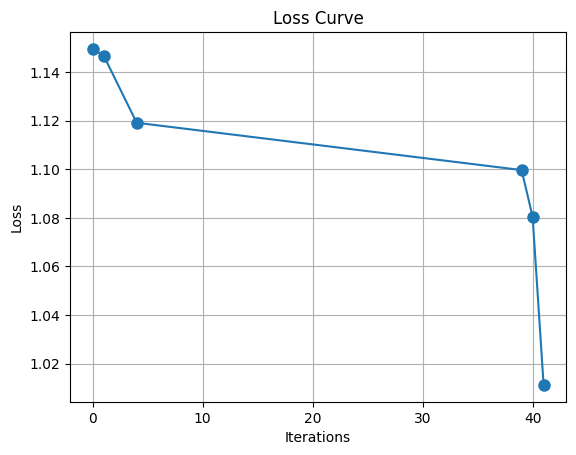

In [93]:
plt.plot(
    list(minor_losses.keys()),
    list(minor_losses.values()),
    "o-",
    markersize=8,
)
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)

# Show the plot
plt.show()

El resultado es igual de malo que asignar los valores aleatorios.

 - **17.b** Prueba también este enfoque con los datos de la triple espiral.

In [94]:
# SOL EJ 17b
import numpy as np
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()

minor_losses = {}

X, y = spiral_data(samples=300, classes=3)

# Define la estructura de la red neuronal
dense1 = Layer_Dense(n_inputs=2, n_neurons=64)
relu = Activation_ReLU()
dense2 = Layer_Dense(n_inputs=64, n_neurons=3)
softmax = Activation_Softmax()
categorical_crossentropy = Loss_CategoricalCrossentropy()

# Parámetros iniciales
best_loss = float("inf")
best_weights1 = dense1.weights.copy()
best_biases1 = dense1.biases.copy()
best_weights2 = dense2.weights.copy()
best_biases2 = dense2.biases.copy()

for i in range(10000):
    # Copia de los parámetros actuales
    weights1 = dense1.weights.copy()
    biases1 = dense1.biases.copy()
    weights2 = dense2.weights.copy()
    biases2 = dense2.biases.copy()

    # Suma una fracción aleatoria a los parámetros actuales
    weights1 += np.random.normal(0, 0.05, size=weights1.shape)
    biases1 += np.random.normal(0, 0.05, size=biases1.shape)
    weights2 += np.random.normal(0, 0.05, size=weights2.shape)
    biases2 += np.random.normal(0, 0.05, size=biases2.shape)

    # Asigna los nuevos parámetros a las capas
    dense1.weights = weights1
    dense1.biases = biases1
    dense2.weights = weights2
    dense2.biases = biases2

    # Pase hacia adelante
    dense1.forward(X)
    relu.forward(dense1.output)
    dense2.forward(relu.output)
    softmax.forward(dense2.output)

    # Calcula la pérdida
    loss = categorical_crossentropy.calculate(softmax.output, y)

    # Comprueba si la pérdida es menor que la mejor pérdida anterior
    if loss < best_loss:
        best_loss = loss
        best_weights1 = weights1
        best_biases1 = biases1
        best_weights2 = weights2
        best_biases2 = biases2
        minor_losses[i] = best_loss

    if i % 100 == 0:
        print(f"Iteración {i}: Pérdida = {loss}")

# Restaura los mejores parámetros
dense1.weights = best_weights1
dense1.biases = best_biases1
dense2.weights = best_weights2
dense2.biases = best_biases2

# Pase hacia adelante con los mejores parámetros
dense1.forward(X)
relu.forward(dense1.output)
dense2.forward(relu.output)
softmax.forward(dense2.output)

# Calcula la pérdida final y la precisión
final_loss = categorical_crossentropy.calculate(softmax.output, y)
predictions = np.argmax(softmax.output, axis=1)
accuracy = np.mean(predictions == y)

print(f"Pérdida final: {final_loss}")
print(f"Precisión final: {accuracy}")

Iteración 0: Pérdida = 1.1492513418197632


Iteración 100: Pérdida = 3.129287004470825
Iteración 200: Pérdida = 3.3278684616088867
Iteración 300: Pérdida = 10.974382400512695
Iteración 400: Pérdida = 13.212053298950195
Iteración 500: Pérdida = 12.096970558166504
Iteración 600: Pérdida = 12.610770225524902
Iteración 700: Pérdida = 10.37720775604248
Iteración 800: Pérdida = 13.405790328979492
Iteración 900: Pérdida = 13.281869888305664
Iteración 1000: Pérdida = 16.116046905517578
Iteración 1100: Pérdida = 16.118099212646484
Iteración 1200: Pérdida = 16.118099212646484
Iteración 1300: Pérdida = 16.118099212646484
Iteración 1400: Pérdida = 16.118099212646484
Iteración 1500: Pérdida = 16.118099212646484
Iteración 1600: Pérdida = 16.118099212646484
Iteración 1700: Pérdida = 16.118099212646484
Iteración 1800: Pérdida = 16.118099212646484


C:\Users\Bl1tty\AppData\Local\Temp\ipykernel_9544\583764662.py:5: RuntimeWarning: overflow encountered in exp
  self.output = np.exp(inputs - np.max(inputs, axis=1, keepdims=True)) / np.sum(np.exp(inputs), axis=1, keepdims=True)


Iteración 1900: Pérdida = 16.118099212646484
Iteración 2000: Pérdida = 16.118099212646484
Iteración 2100: Pérdida = 16.118099212646484
Iteración 2200: Pérdida = 16.118099212646484
Iteración 2300: Pérdida = 16.118099212646484
Iteración 2400: Pérdida = 16.118099212646484
Iteración 2500: Pérdida = 16.118099212646484
Iteración 2600: Pérdida = 16.118099212646484
Iteración 2700: Pérdida = 16.118099212646484
Iteración 2800: Pérdida = 16.118099212646484


c:\Users\Bl1tty\Documents\Uni\Optimizacion\optimizacion_env\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Iteración 2900: Pérdida = 16.118099212646484
Iteración 3000: Pérdida = 16.118099212646484
Iteración 3100: Pérdida = 16.118099212646484
Iteración 3200: Pérdida = 16.118099212646484
Iteración 3300: Pérdida = 16.118099212646484
Iteración 3400: Pérdida = 16.118099212646484
Iteración 3500: Pérdida = 16.118099212646484
Iteración 3600: Pérdida = 16.118099212646484
Iteración 3700: Pérdida = 16.118099212646484
Iteración 3800: Pérdida = 16.118099212646484
Iteración 3900: Pérdida = 16.118099212646484
Iteración 4000: Pérdida = 16.118099212646484
Iteración 4100: Pérdida = 16.118099212646484
Iteración 4200: Pérdida = 16.118099212646484
Iteración 4300: Pérdida = 16.118099212646484
Iteración 4400: Pérdida = 16.118099212646484
Iteración 4500: Pérdida = 16.118099212646484
Iteración 4600: Pérdida = 16.118099212646484
Iteración 4700: Pérdida = 16.118099212646484
Iteración 4800: Pérdida = 16.118099212646484
Iteración 4900: Pérdida = 15.968062400817871
Iteración 5000: Pérdida = 16.118099212646484
Iteración 

C:\Users\Bl1tty\AppData\Local\Temp\ipykernel_9544\583764662.py:5: RuntimeWarning: overflow encountered in divide
  self.output = np.exp(inputs - np.max(inputs, axis=1, keepdims=True)) / np.sum(np.exp(inputs), axis=1, keepdims=True)
C:\Users\Bl1tty\AppData\Local\Temp\ipykernel_9544\583764662.py:5: RuntimeWarning: divide by zero encountered in divide
  self.output = np.exp(inputs - np.max(inputs, axis=1, keepdims=True)) / np.sum(np.exp(inputs), axis=1, keepdims=True)
C:\Users\Bl1tty\AppData\Local\Temp\ipykernel_9544\583764662.py:5: RuntimeWarning: invalid value encountered in divide
  self.output = np.exp(inputs - np.max(inputs, axis=1, keepdims=True)) / np.sum(np.exp(inputs), axis=1, keepdims=True)


Iteración 9100: Pérdida = nan
Iteración 9200: Pérdida = nan
Iteración 9300: Pérdida = 14.794915199279785
Iteración 9400: Pérdida = 15.265427589416504
Iteración 9500: Pérdida = 14.733641624450684
Iteración 9600: Pérdida = 15.099380493164062
Iteración 9700: Pérdida = 15.474234580993652
Iteración 9800: Pérdida = 15.808900833129883
Iteración 9900: Pérdida = 15.982349395751953
Pérdida final: 1.0291868448257446
Precisión final: 0.3333333333333333


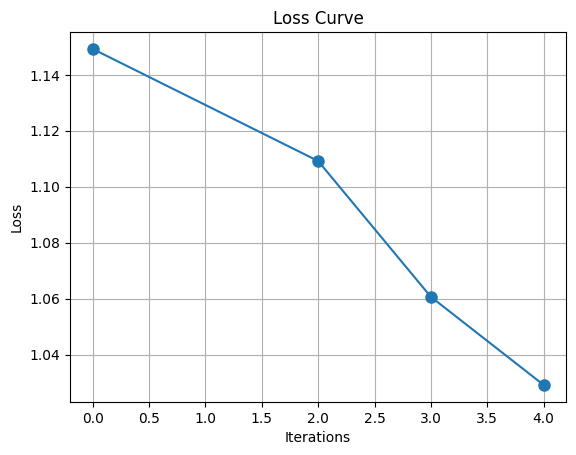

In [95]:
plt.plot(
    list(minor_losses.keys()),
    list(minor_losses.values()),
    "o-",
    markersize=8,
)
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)

# Show the plot
plt.show()

En este caso la pérdida se mantiene igual y por tanto la red no ha aprendido nada

## Ejercicio 18: Introducción a la *backpropagation*

La siguiente imagen corresponde a una simple neurona + f. activación, con 3 inputs. Los valores de inputs, pesos y sesgo se han fijado aleatoriamente. En la imagen también se indica en rojo el valor del gradiente recibido de una capa posterior (en este ejemplo, $1$):

<center>
<div>
<img src="https://drive.upm.es/index.php/apps/files_sharing/ajax/publicpreview.php?x=1920&y=457&a=true&file=capa_neuronas_simple_gradiente.png&t=nJHrGFJQ8VVuZK7&scalingup=0" width="500"/>
</div>
</center>

Pensemos en esta neurona como una gran función, cuyas variables independientes o parámetros de entrada son los inputs, pesos y sesgo. Esta gran función consiste en varias funciones más simples: hay una multiplicación de inputs y pesos, suma de estos valores y el sesgo, así como una la función activación ReLU - 3 funciones encadenadas en total:
$$
\operatorname{ReLU}\left(\operatorname{sum}\left(\operatorname{mul}\left(x_0, w_0\right), \operatorname{mul}\left(x_1, w_1\right), \operatorname{mul}\left(x_2, w_2\right), b\right)\right)
$$
Para calcular cómo afecta cada variable al resultado, debemos calcular sus derivadas parciales. Como hay varias funciones combinadas, debemos aplicar la regla de la cadena.

Calcula cómo impacta en **el input $x_0$** el gradiente recibido, es decir:

$$
\begin{aligned}
& \frac{\partial}{\partial x_0}\left[\operatorname{ReLU}\left(\operatorname{sum}\left(\operatorname{mul}\left(x_0, w_0\right), \operatorname{mul}\left(x_1, w_1\right), \operatorname{mul}\left(x_2, w_2\right), b\right)\right)\right]
\end{aligned}
$$

In [96]:
# SOL EJ 18
x = np.array([1, -2, 3])
w = np.array([-3, -1, 2])
b = 1
ReLU = Activation_ReLU()

# Since we are using numpy arrays, the values are vectorized
# therefore we can simply multiply the weights with '*' operand
ReLU.forward(np.sum(x*w)+b)
print(ReLU.output)

# Derivative part
if ReLU.output <= 0:
    x[0] = 0
else:
    x[0] = w[0]

print("New x0: ", x[0])

6
New x0:  -3


## Ejercicio 19: Capa densa con *backpropagation*

Extiende la implementación que hiciste en el ejercicio 9, incluyendo un nuevo método llamado ```backward(self, dvalues)``` que implemente el backward pass (excluyendo la función de activación). El parámetro ```dvalues``` es una matriz donde cada fila se refiere a una observación del batch, y cada elemento de dicha fila es el gradiente llegado de aguas abajo. Dicho método debe calcular los valores ```self.dweights```, ```self.dbiases``` y ```self.dinputs``` que recogen las distintas derivadas parciales para cada parámetro. Presta atención a las dimensiones.

In [97]:
import numpy as np

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        self.output = None
        self.dweights = None
        self.dbiases = None

    def forward(self, inputs):
        self.inputs = inputs      #### esto de clase no se
        self.output = np.dot(inputs, self.weights) + self.biases

    def backward(self, dvalues):
        # Gradiente de los pesos
        #### AQUI HE CAMBIADO ALGO
        self.dweights = np.dot(self.inputs.T, dvalues)

        # Gradiente de los sesgos
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)

        # Gradiente de los self.output
        self.dinputs = np.dot(dvalues, self.weights.T)

## Ejercicio 20: ReLU con *backpropagation*

Extiende la implementación que hiciste en el ejercicio 11, incluyendo un nuevo método llamado ```backward(self, dvalues)``` que implemente el backward pass. El parámetro ```dvalues``` es el gradiente que le llega de capas posteriores. El método debe calcular los valores ```self.dinputs```.

In [98]:
class Activation_ReLU:
    def forward(self, inputs):
        self.inputs = inputs          #### AQUI HE TOCADO (DE CLASE)
        self.output = np.maximum(0, inputs)

    def backward(self, dvalues):
        # Inicializar el gradiente de las entradas con ceros
        self.dinputs = dvalues.copy()     ### AQUI HE TOCADO DE CLASE

        # Calcular el gradiente solo donde los valores originales eran mayores que cero
        self.dinputs[self.output <= 0] = 0

## Ejercicio 21: Función de pérdidas con *backpropagation*

Extiende la implementación que hiciste en el ejercicio 15, incluyendo un nuevo método llamado ```backward(self, dvalues, y_true)``` que implemente el backward pass. El parámetro ```dvalues``` son los valores predichos ($\hat{y}_{i,j}$) y ```y_true``` son los valores objetivo. El método debe calcular los valores ```self.dinputs```, el vector derivada respecto a los inputs. Ten en cuenta lo siguiente:
 - Debes convertir los ```y_true``` en *one-hot* vectors.
 - Una vez calcules la derivada según el desarrollo teórico, normaliza el resultado. Esto evitará problemas con muestras grandes en pasos posteriores. Simplemente divide el resultado final por la longitud de la muestra (```len(dvalues)```)

In [99]:
# SOL EJ 21
from abc import ABC, abstractmethod
import numpy as np

class Loss(ABC):

    @abstractmethod
    def forward(self, output, y):
        pass

    def calculate(self, output, y):
        """
        Return sample losses (mean)
         - output: output of the last layer of the network
         - y: ground truth
        """
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss

class CategoricalCrossEntropy(Loss):
    def forward(self, output, y):
        sample = len(output)

        y_pred_clipped = np.clip(output, 1e-7, 1 - 1e-7)
        correct_confidences = y_pred_clipped[[range(sample)], y]

        negative_log_probs = -np.log(correct_confidences)

        return negative_log_probs

    def backward(self, dvalues, y_true):
        sample = len(dvalues)

        # Create a 2D array with principal diagonal of ones and else 0s
        y_true = np.eye(dvalues.shape[1])[y_true]

        self.dinputs = -y_true / dvalues
        self.dinputs = self.dinputs / sample

## Ejercicio 22: SoftMax con *backpropagation*

Se pretende extender la implementación que hiciste en el ejercicio 12, incluyendo un nuevo método llamado ```backward(self, dvalues)``` que implemente el backward pass. El parámetro ```dvalues``` es el gradiente que le llega de capas posteriores. El método debe calcular los valores ```self.dinputs```.
 - **22a.** Comienza calculando un caso particular. Supón que la salida de la función Softmax ha sido ```softmax_output = [0.7, 0.1, 0.2]```. El resultado debe ser una matriz (el Jacobiano) de dimensión $3x3$.

In [100]:
# SOL 22a
softmax_output = np.array([0.7, 0.1, 0.2])
J = np.zeros((3, 3))

for i in range(3):
    for j in range(3):
        if i == j:
            J[i, j] = softmax_output[i] * (1 - softmax_output[i])
        else:
            J[i, j] = -softmax_output[i] * softmax_output[j]

print(J)

[[ 0.21 -0.07 -0.14]
 [-0.07  0.09 -0.02]
 [-0.14 -0.02  0.16]]


 - **22b.** Generaliza el código anterior. Extiende la clase del ejercicio 12 con el método llamado ```backward(self, dvalues)```. A continuación se incluye una plantilla de desarrollo que debe ser completada. Recuerda copiar el resto de métodos de la clase.

In [101]:
# SOL 22b -> complete lines with ######

class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities

    # Backward pass
    def backward(self, dvalues):
        # Create an uninitialized array with the same dimension as dvalues
        self.dinputs = np.empty(dvalues.shape)

        # Enumerate outputs and gradients
        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):
            # Flatten output array - use 'reshape'
            single_output = single_output.reshape(-1, 1)

            # Calculate Jacobian matrix of the output
            matrix = np.zeros(shape=(single_output.shape[0], single_output.shape[0]))
            for i, val in enumerate(single_output):
                matrix[i, i] = val
            jacobian_matrix = matrix - np.dot(single_output, single_output.T)

            # Calculate sample-wise gradient and add it to the array of sample gradients
            self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)




## Ejercicio 23: Softmax + entropía cruzada

Al calcular juntas las derivadas de la función Softmax y la función de pérdidas de entropía cruzada categórica, los cáluclos se simplifican notablemente. Implementa el método que hace el *backward pass* (i.e. ```backward(self, dvalues, y_true)```) de nueva clase llamada ```Activation_Softmax_Loss_CategoricalCrossentropy``` (el resto de métodos se dan ya implementados). Recuerda normalizar el resultado dividiéndolo por el número de muestras (```len(dvalues)```) para evitar problemas en pasos futuros.

In [102]:
class Activation_Softmax_Loss_CategoricalCrossentropy:
    def __init__(self) -> None:
        self.softmax = Activation_Softmax()
        self.loss = CategoricalCrossEntropy()

    def forward(self, inputs, y_true):
        self.softmax.forward(inputs)
        self.output = self.softmax.output
        return self.loss.calculate(self.output, y_true)

    def backward(self, y_hat, y_true):
        samples = len(y_hat)
        self.dinputs = y_hat.copy()

        self.dinputs[range(samples), y_true] -= 1
        self.dinputs /= samples

## Ejercicio 24: Comprobación Softmax + entropía cruzada

Se pretende comprobar si el *backpropagation* combinado (Softmax + entropía cruzada) devuelve los mismos valores en comparación con cuando retropropagamos gradientes a través de ambas funciones por separado. Para este ejemplo, vamos a crear una salida de la función Softmax y algunos valores objetivo. Retropropágalos utilizando ambas soluciones, y comprueba que obtienes los mismos resultados

In [103]:
# SOL EJ 24

import numpy as np
import nnfs

nnfs.init()

# Salida de la función Softmax y valores objetivo
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                            [0.1, 0.5, 0.4],
                            [0.02, 0.9, 0.08]])

class_targets = np.array([0, 1, 1])

# Retropropagación a través de Softmax y Entropía Cruzada por separado
softmax = Activation_Softmax()
loss = CategoricalCrossEntropy()
loss.backward(softmax_outputs, class_targets)
softmax.output = softmax_outputs
softmax.backward(loss.dinputs)

# Retropropagación combinada
combined_loss = Activation_Softmax_Loss_CategoricalCrossentropy()
combined_loss.backward(softmax_outputs, class_targets)

# Compara los gradientes resultantes
print("Gradientes por separado:")
print(softmax.dinputs)
print("Gradientes combinados:")
print(combined_loss.dinputs)

# Comprueba si los gradientes son iguales o muy cercanos
if np.allclose(softmax.dinputs, combined_loss.dinputs):
    print("\nLos gradientes son iguales.")
else:
    print("\nLos gradientes no son iguales.")


Gradientes por separado:
[[-0.09999999  0.03333334  0.06666667]
 [ 0.03333334 -0.16666667  0.13333334]
 [ 0.00666667 -0.03333332  0.02666667]]
Gradientes combinados:
[[-0.1         0.03333333  0.06666667]
 [ 0.03333333 -0.16666667  0.13333333]
 [ 0.00666667 -0.03333333  0.02666667]]

Los gradientes son iguales.


C:\Users\Bl1tty\AppData\Local\Temp\ipykernel_9544\2930397270.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  matrix[i, i] = val


## Ejercicio 25: *Backward pass* de toda la red

Realiza un *backward pass* de la red que usaste en el ejercicio *15b*.

In [104]:
from nnfs.datasets import spiral_data

X, y = spiral_data(samples=100, classes=3)

# capa 1
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()

# capa 2
dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()
loss = CategoricalCrossEntropy()

dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)
loss.forward(activation2.output, y).shape

(1, 300)

In [105]:
# SOL EJ 25
nnfs.init()

# Forward
dense1 = Layer_Dense(n_inputs=2, n_neurons=3)
relu = Activation_ReLU()

dense2 = Layer_Dense(n_inputs=3, n_neurons=3)
loss_softmax = Activation_Softmax_Loss_CategoricalCrossentropy()

dense1.forward(X)
relu.forward(dense1.output)

dense2.forward(relu.output)
loss = loss_softmax.forward(dense2.output, y)
print(f"Loss: {loss}")

#Backward
loss_softmax.backward(loss_softmax.output, y)
dense2.backward(loss_softmax.dinputs)
relu.backward(dense2.dinputs)
dense1.backward(relu.dinputs)

print(dense1.dweights)

Loss: 1.0986136198043823
[[-1.5735535e-05  6.1952458e-05  1.4190499e-05]
 [ 7.0554065e-06  1.0230539e-04  8.9116853e-05]]


## Ejercicio 26: Optimizador — Descenso del gradiente

Programa una clase llamada ```Optimizer_SGD``` que implemente el optimizador de descenso de gradiente. Pasa a su constructor un parámetro ```learning_rate``` por defecto de $1$. Dicha clase deberá contener un único método llamado ```update_params(layer)``` al que se le pase una capa y aplique sus correspondientes gradientes a la actualización de sus parámetros.

In [106]:
# SOL EJ 26
class Optimizer_SGD:
    def __init__(self, learning_rate=1.0):
        # Establecer la tasa de aprendizaje
        self.learning_rate = learning_rate

    def update_params(self, layer):
        # Actualizar los pesos y sesgos de la capa usando SGD
        layer.weights += -self.learning_rate * layer.dweights
        layer.biases += -self.learning_rate * layer.dbiases

## Ejercicio 27: Optimización sobre el caso de la triple espiral

Partiendo del código al que llegaste en el ejercicio 25, añade un optimizador que actualice los parámetros de la red. Realiza 10000 iteraciones (*epoch*). Observa como evoluciona la precisión y las pérdidas a lo largo del entrenamiento.


En adelante, utiliza una arquitectura con 64 neuronas por capa.

Epoch: 0  Loss: 1.098594307899475
Epoch: 1  Loss: 1.0985743999481201
Epoch: 2  Loss: 1.098556399345398
Epoch: 3  Loss: 1.0985409021377563
Epoch: 4  Loss: 1.098527431488037
Epoch: 5  Loss: 1.098514437675476
Epoch: 6  Loss: 1.0985021591186523
Epoch: 7  Loss: 1.0984902381896973
Epoch: 8  Loss: 1.098477840423584
Epoch: 9  Loss: 1.0984655618667603
Epoch: 10  Loss: 1.0984524488449097
Epoch: 11  Loss: 1.0984398126602173
Epoch: 12  Loss: 1.0984269380569458
Epoch: 13  Loss: 1.0984135866165161
Epoch: 14  Loss: 1.0983996391296387
Epoch: 15  Loss: 1.098384976387024
Epoch: 16  Loss: 1.0983697175979614
Epoch: 17  Loss: 1.098353624343872
Epoch: 18  Loss: 1.098337173461914
Epoch: 19  Loss: 1.09831964969635
Epoch: 20  Loss: 1.0983012914657593
Epoch: 21  Loss: 1.0982822179794312
Epoch: 22  Loss: 1.0982623100280762
Epoch: 23  Loss: 1.0982412099838257
Epoch: 24  Loss: 1.098219633102417
Epoch: 25  Loss: 1.098197102546692
Epoch: 26  Loss: 1.0981736183166504
Epoch: 27  Loss: 1.0981488227844238
Epoch: 28  Los

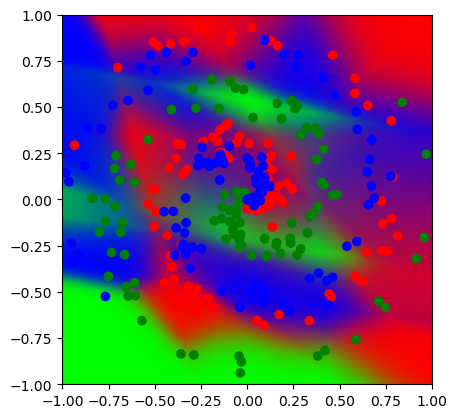

In [57]:
# SOL 27
nnfs.init()

X, y = spiral_data(samples=100, classes=3)

# Forward
dense1 = Layer_Dense(n_inputs=2, n_neurons=64)
relu = Activation_ReLU()

dense2 = Layer_Dense(n_inputs=64, n_neurons=3)
loss_softmax = Activation_Softmax_Loss_CategoricalCrossentropy()

sgd = Optimizer_SGD()

for epoch in range(10000):
    dense1.forward(X)
    relu.forward(dense1.output)

    dense2.forward(relu.output)
    loss = loss_softmax.forward(dense2.output, y)
    print(f"Epoch: {epoch}  Loss: {loss}")

    # Backward
    loss_softmax.backward(loss_softmax.output, y)
    dense2.backward(loss_softmax.dinputs)
    relu.backward(dense2.dinputs)
    dense1.backward(relu.dinputs)

    sgd.update_params(dense1)
    sgd.update_params(dense2)

model = [dense1, relu, dense2, loss_softmax]
num_points = 100
plot_prediction_performance_spiral(model, X, y, num_points)

# Ejercicio 28: Misma solución utilizando ```keras```

Busca documentación sobre cómo implementar redes neuronales con el módulo ```tf.keras``` (echa un vistazo por ejemplo a [este enlace](https://stackoverflow.com/questions/64689483/how-to-do-multiclass-classification-with-keras), o [este otro](https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/)). Crear una arquitectura similar a la usada en el ejercicio anterior, directamente usando las herramientas disponibles en dicho paquete.

In [59]:
%pip install -q tensorflow -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# SOL EJ 28
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from nnfs.datasets import spiral_data
from sklearn.model_selection import train_test_split

X, y = spiral_data(samples=100, classes=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

# create model
model = Sequential()
model.add(Dense(64, input_dim=2, activation='relu'))
model.add(Dense(3, activation='softmax'))
# Compile model
model.compile(loss="categorical_crossentropy", optimizer= "adam", metrics=['accuracy'])

#es = EarlyStopping(monitor='loss', min_delta=0.005, patience=1, verbose=1, mode='auto')
model.fit(X_train, y_train, epochs = 100, shuffle = True, batch_size=128, verbose=2, validation_split=0.2)

scores = model.evaluate(X_test, y_test)
print(model.metrics_names[0], model.metrics_names[1])

2023-12-11 18:58:53.291674: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-11 18:58:53.296696: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-11 18:58:53.345667: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-11 18:58:53.345721: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-11 18:58:53.350853: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

Epoch 1/100


2023-12-11 18:58:55.028553: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-11 18:58:55.041823: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


2/2 - 0s - loss: 1.1131 - accuracy: 0.3000 - val_loss: 1.1206 - val_accuracy: 0.2927 - 347ms/epoch - 174ms/step
Epoch 2/100
2/2 - 0s - loss: 1.1108 - accuracy: 0.3063 - val_loss: 1.1205 - val_accuracy: 0.2439 - 19ms/epoch - 10ms/step
Epoch 3/100
2/2 - 0s - loss: 1.1090 - accuracy: 0.3250 - val_loss: 1.1198 - val_accuracy: 0.2439 - 18ms/epoch - 9ms/step
Epoch 4/100
2/2 - 0s - loss: 1.1074 - accuracy: 0.3250 - val_loss: 1.1188 - val_accuracy: 0.2439 - 17ms/epoch - 9ms/step
Epoch 5/100
2/2 - 0s - loss: 1.1055 - accuracy: 0.3375 - val_loss: 1.1173 - val_accuracy: 0.2195 - 17ms/epoch - 9ms/step
Epoch 6/100
2/2 - 0s - loss: 1.1040 - accuracy: 0.3500 - val_loss: 1.1156 - val_accuracy: 0.1951 - 18ms/epoch - 9ms/step
Epoch 7/100
2/2 - 0s - loss: 1.1022 - accuracy: 0.3562 - val_loss: 1.1141 - val_accuracy: 0.2439 - 17ms/epoch - 9ms/step
Epoch 8/100
2/2 - 0s - loss: 1.1008 - accuracy: 0.3500 - val_loss: 1.1132 - val_accuracy: 0.2439 - 17ms/epoch - 9ms/step
Epoch 9/100
2/2 - 0s - loss: 1.0992 - ac

## Ejercicio 29: *Learning rate decay*

 - **29.a** Extiende la implementación de la clase ```Optimizer_SGD``` que hiciste en el ejercicio 26 para que incluya un mecanismo que aplique el decaimiento de la tasa de aprendizaje. Ahora, además del argumento ```learning_rate```, el constructor de la clase recibirá el ```decay```. En dicho constructor, inicializa también dos variables adicionales: ```self.current_learning_rate``` (para ir almacenando el *learning rate* en sucesivas iteraciones) y ```self.iterations``` (para ir almacenando el número de iteraciones). Actualiza el método ```update_params``` e implementa dos nuevos métodos:
   - ```pre_update_params(self)```: responsable de actualizar ```self.current_learning_rate```. Está pensado para será ejecutado justo antes de la llamada a ```update_params```.
   - ```post_update_params(self)```: responsable de actualizar ```self.iterations```. Está pensado para será ejecutado justo después de la llamada a ```update_params```.


In [111]:
# SOL EJ 29a

class Optimizer_SGD:
    def __init__(self, learning_rate=1.0, decay=0.0):
        # Establecer la tasa de aprendizaje
        self.decay = decay
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.iterations = 0

    def pre_update_params(self):
      if self.decay:
        self.current_learning_rate = self.learning_rate / (1.0 + self.decay * self.iterations)

    def update_params(self, layer):
        # Actualizar los pesos y sesgos de la capa usando SGD
        layer.weights += -self.learning_rate * layer.dweights
        layer.biases += -self.learning_rate * layer.dbiases

    def post_update_params(self):
      self.iterations += 1

---
  - **29.b** Partiendo del código al que llegaste en el ejercicio 27, prueba el mecanismo de *Learning rate decay* que acabas de implementar. Experimenta con un *decay* de $10^{-2}$ y de $10^{-3}$ ¿Se mejoran los resultados en comparación con los que obtuviste en el ejercicio 27? Recuerda visiualizar los resultados como se explica en el ejercicio 27.

Loss: 1.098594307899475
Loss: 1.0985743999481201
Loss: 1.098556399345398
Loss: 1.0985409021377563
Loss: 1.098527431488037
Loss: 1.098514437675476
Loss: 1.0985021591186523
Loss: 1.0984902381896973
Loss: 1.098477840423584
Loss: 1.0984655618667603
Loss: 1.0984524488449097
Loss: 1.0984398126602173
Loss: 1.0984269380569458
Loss: 1.0984135866165161
Loss: 1.0983996391296387
Loss: 1.098384976387024
Loss: 1.0983697175979614
Loss: 1.098353624343872
Loss: 1.098337173461914
Loss: 1.09831964969635
Loss: 1.0983012914657593
Loss: 1.0982822179794312
Loss: 1.0982623100280762
Loss: 1.0982412099838257
Loss: 1.098219633102417
Loss: 1.098197102546692
Loss: 1.0981736183166504
Loss: 1.0981488227844238
Loss: 1.0981227159500122
Loss: 1.098095417022705
Loss: 1.0980666875839233
Loss: 1.098036527633667
Loss: 1.0980048179626465
Loss: 1.0979713201522827
Loss: 1.0979360342025757
Loss: 1.0978988409042358
Loss: 1.0978598594665527
Loss: 1.0978189706802368
Loss: 1.097776174545288
Loss: 1.097731113433838
Loss: 1.09768390

Loss: 1.0889136791229248
Loss: 1.088626503944397
Loss: 1.0883400440216064
Loss: 1.0880528688430786
Loss: 1.0877667665481567
Loss: 1.0874831676483154
Loss: 1.0871999263763428
Loss: 1.0869206190109253
Loss: 1.0866446495056152
Loss: 1.0863715410232544
Loss: 1.0861022472381592
Loss: 1.0858372449874878
Loss: 1.0855778455734253
Loss: 1.0853232145309448
Loss: 1.0850729942321777
Loss: 1.0848289728164673
Loss: 1.084591031074524
Loss: 1.0843585729599
Loss: 1.084132432937622
Loss: 1.0839121341705322
Loss: 1.0836975574493408
Loss: 1.0834897756576538
Loss: 1.0832886695861816
Loss: 1.0830929279327393
Loss: 1.0829039812088013
Loss: 1.0827200412750244
Loss: 1.0825449228286743
Loss: 1.0823755264282227
Loss: 1.082211971282959
Loss: 1.082054615020752
Loss: 1.0819014310836792
Loss: 1.0817553997039795
Loss: 1.0816121101379395
Loss: 1.081472396850586
Loss: 1.0813391208648682
Loss: 1.081211805343628
Loss: 1.0810900926589966
Loss: 1.0809720754623413
Loss: 1.0808537006378174
Loss: 1.080736517906189
Loss: 1.080

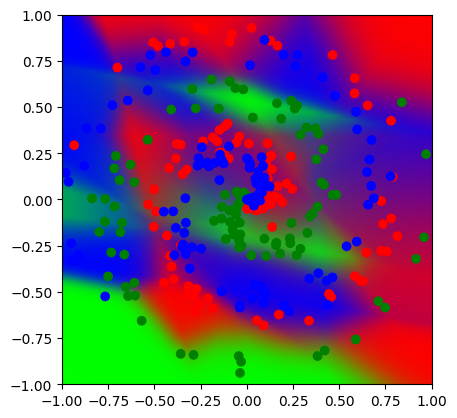

In [112]:
# SOL EJ 29b
nnfs.init()
X, y = spiral_data(samples=100, classes=3)


# Forward
dense1 = Layer_Dense(n_inputs=2, n_neurons=64)
relu = Activation_ReLU()

dense2 = Layer_Dense(n_inputs=64, n_neurons=3)
loss_softmax = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_SGD()

for epoch in range(10000):
  dense1.forward(X)
  relu.forward(dense1.output)

  dense2.forward(relu.output)
  loss = loss_softmax.forward(dense2.output, y)
  print(f"Loss: {loss}")

  #Backward
  loss_softmax.backward(loss_softmax.output, y)
  dense2.backward(loss_softmax.dinputs)
  relu.backward(dense2.dinputs)
  dense1.backward(relu.dinputs)

  optimizer.pre_update_params()
  optimizer.update_params(dense1)
  optimizer.update_params(dense2)
  optimizer.post_update_params()

model = [dense1, relu, dense2, loss_softmax]
num_points = 100
plot_prediction_performance_spiral(model, X, y, num_points)

## Ejercicio 30: Descenso de gradiente con momentum

 - **30.a** Extiende la implementación de la clase ```Optimizer_SGD``` que hiciste en el ejercicio 29 para que incluya el mecanismo de *momentum*. Sigue la siguiente plantilla de desarrollo:

In [113]:
# SOL EJ 30a -> completa las líneas con ######

# SGD optimizer con momentum
class Optimizer_SGD:

    def __init__(self, learning_rate=1., decay=0., momentum=0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.momentum = momentum

    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))

    def update_params(self, layer):

        if self.momentum:

            if not hasattr(layer, 'weight_momentums'):
                layer.weight_momentums = np.zeros_like(layer.weights)
                layer.bias_momentums = np.zeros_like(layer.biases)

            weight_updates = self.momentum * layer.weight_momentums - self.current_learning_rate * layer.dweights
            layer.weight_momentums = weight_updates

            bias_updates = self.momentum * layer.bias_momentums - self.current_learning_rate * layer.dbiases
            layer.bias_momentums = bias_updates

        else:
            weight_updates = -self.current_learning_rate * layer.dweights
            bias_updates = -self.current_learning_rate * layer.dbiases

        layer.weights += weight_updates
        layer.biases += bias_updates

    def post_update_params(self):
        self.iterations += 1

Loss: 1.098594307899475
Loss: 1.0985743999481201
Loss: 1.098556399345398
Loss: 1.0985409021377563
Loss: 1.098527431488037
Loss: 1.098514437675476
Loss: 1.0985021591186523
Loss: 1.0984902381896973
Loss: 1.098477840423584
Loss: 1.0984655618667603
Loss: 1.0984524488449097
Loss: 1.0984398126602173
Loss: 1.0984269380569458
Loss: 1.0984135866165161
Loss: 1.0983996391296387
Loss: 1.098384976387024
Loss: 1.0983697175979614
Loss: 1.098353624343872
Loss: 1.098337173461914
Loss: 1.09831964969635
Loss: 1.0983012914657593
Loss: 1.0982822179794312
Loss: 1.0982623100280762
Loss: 1.0982412099838257
Loss: 1.098219633102417
Loss: 1.098197102546692
Loss: 1.0981736183166504
Loss: 1.0981488227844238
Loss: 1.0981227159500122
Loss: 1.098095417022705
Loss: 1.0980666875839233
Loss: 1.098036527633667
Loss: 1.0980048179626465
Loss: 1.0979713201522827
Loss: 1.0979360342025757
Loss: 1.0978988409042358
Loss: 1.0978598594665527
Loss: 1.0978189706802368
Loss: 1.097776174545288
Loss: 1.097731113433838
Loss: 1.09768390

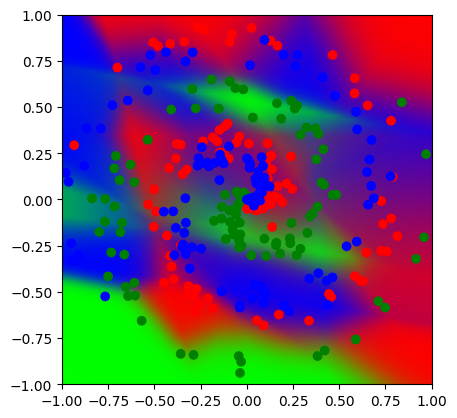

In [114]:
# SOL EJ 29b
nnfs.init()
X, y = spiral_data(samples=100, classes=3)


# Forward
dense1 = Layer_Dense(n_inputs=2, n_neurons=64)
relu = Activation_ReLU()

dense2 = Layer_Dense(n_inputs=64, n_neurons=3)

loss_softmax = Activation_Softmax_Loss_CategoricalCrossentropy()


optimizer = Optimizer_SGD()

for epoch in range(10000):
  dense1.forward(X)
  relu.forward(dense1.output)

  dense2.forward(relu.output)
  loss = loss_softmax.forward(dense2.output, y)
  print(f"Loss: {loss}")

  #Backward
  loss_softmax.backward(loss_softmax.output, y)
  dense2.backward(loss_softmax.dinputs)
  relu.backward(dense2.dinputs)
  dense1.backward(relu.dinputs)

  optimizer.pre_update_params()
  optimizer.update_params(dense1)
  optimizer.update_params(dense2)
  optimizer.post_update_params()

model = [dense1, relu, dense2, loss_activation]
num_points = 100
plot_prediction_performance_spiral(model, X, y, num_points)

  - **30.b** Partiendo del código al que llegaste en el ejercicio 29, prueba el mecanismo de momentum que acabas de implementar. Probar con un *decay* de $10^{-3}$ y un *momentum* de $0.5$ y luego de $0.9$. ¿Se mejoran los resultados en comparación con los que obtuviste en el ejercicio 29? Recuerda visiualizar los resultados como se explica en el ejercicio 27.

Loss: 1.098594307899475
Loss: 1.0985743999481201
Loss: 1.0985490083694458
Loss: 1.098524808883667
Loss: 1.098501443862915
Loss: 1.0984784364700317
Loss: 1.098454475402832
Loss: 1.0984299182891846
Loss: 1.098405122756958
Loss: 1.09837806224823
Loss: 1.0983489751815796
Loss: 1.0983176231384277
Loss: 1.0982838869094849
Loss: 1.0982474088668823
Loss: 1.0982074737548828
Loss: 1.0981640815734863
Loss: 1.098116397857666
Loss: 1.0980641841888428
Loss: 1.0980068445205688
Loss: 1.0979442596435547
Loss: 1.0978752374649048
Loss: 1.0977998971939087
Loss: 1.09771728515625
Loss: 1.0976263284683228
Loss: 1.0975261926651
Loss: 1.0974165201187134
Loss: 1.0972965955734253
Loss: 1.097166895866394
Loss: 1.0970255136489868
Loss: 1.0968714952468872
Loss: 1.0967037677764893
Loss: 1.0965216159820557
Loss: 1.0963234901428223
Loss: 1.0961087942123413
Loss: 1.095876693725586
Loss: 1.0956257581710815
Loss: 1.0953558683395386
Loss: 1.095065712928772
Loss: 1.0947550535202026
Loss: 1.094422459602356
Loss: 1.094067215

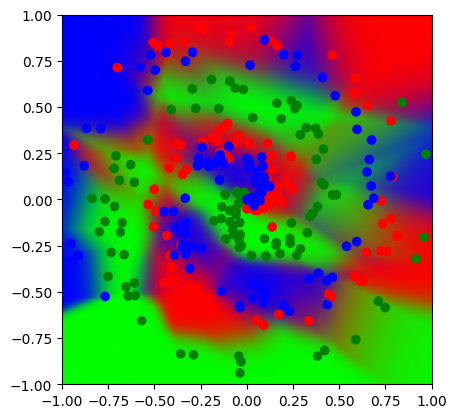

In [115]:
# SOL EJ 30b
nnfs.init()
X, y = spiral_data(samples=100, classes=3)


# Forward
dense1 = Layer_Dense(n_inputs=2, n_neurons=64)
relu = Activation_ReLU()

dense2 = Layer_Dense(n_inputs=64, n_neurons=3)

loss_softmax = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_SGD(momentum=0.5, decay=1e-3)

for epoch in range(10000):
  dense1.forward(X)
  relu.forward(dense1.output)

  dense2.forward(relu.output)
  loss = loss_softmax.forward(dense2.output, y)
  print(f"Loss: {loss}")

  #Backward
  loss_softmax.backward(loss_softmax.output, y)
  dense2.backward(loss_softmax.dinputs)
  relu.backward(dense2.dinputs)
  dense1.backward(relu.dinputs)

  optimizer.pre_update_params()
  optimizer.update_params(dense1)
  optimizer.update_params(dense2)
  optimizer.post_update_params()

model = [dense1, relu, dense2, loss_activation]
num_points = 100
plot_prediction_performance_spiral(model, X, y, num_points)

Loss: 1.098594307899475
Loss: 1.0985743999481201
Loss: 1.098543643951416
Loss: 1.0985089540481567
Loss: 1.0984690189361572
Loss: 1.0984272956848145
Loss: 1.098375916481018
Loss: 1.0983115434646606
Loss: 1.0982292890548706
Loss: 1.0981260538101196
Loss: 1.097996473312378
Loss: 1.0978326797485352
Loss: 1.0976234674453735
Loss: 1.09735906124115
Loss: 1.0970265865325928
Loss: 1.0966092348098755
Loss: 1.0960901975631714
Loss: 1.0954514741897583
Loss: 1.094668984413147
Loss: 1.0937199592590332
Loss: 1.0925889015197754
Loss: 1.091275930404663
Loss: 1.0897902250289917
Loss: 1.0881620645523071
Loss: 1.086451768875122
Loss: 1.0847556591033936
Loss: 1.0831935405731201
Loss: 1.0818616151809692
Loss: 1.080838680267334
Loss: 1.0801852941513062
Loss: 1.079810380935669
Loss: 1.0796068906784058
Loss: 1.079556941986084
Loss: 1.0795694589614868
Loss: 1.079534649848938
Loss: 1.0794236660003662
Loss: 1.0791865587234497
Loss: 1.0788244009017944
Loss: 1.078395128250122
Loss: 1.0779441595077515
Loss: 1.077480

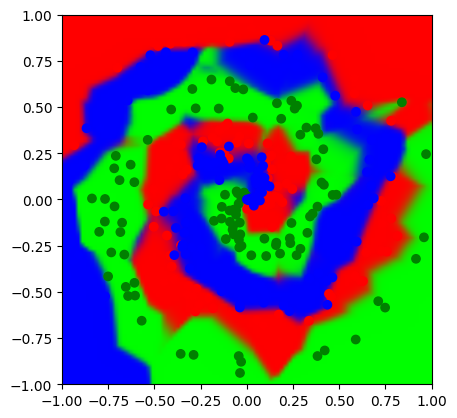

In [116]:
# SOL EJ 30b
nnfs.init()
X, y = spiral_data(samples=100, classes=3)


# Forward
dense1 = Layer_Dense(n_inputs=2, n_neurons=64)
relu = Activation_ReLU()

dense2 = Layer_Dense(n_inputs=64, n_neurons=3)

loss_softmax = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_SGD(momentum=0.9, decay=1e-3)

for epoch in range(10000):
  dense1.forward(X)
  relu.forward(dense1.output)

  dense2.forward(relu.output)
  loss = loss_softmax.forward(dense2.output, y)
  print(f"Loss: {loss}")

  #Backward
  loss_softmax.backward(loss_softmax.output, y)
  dense2.backward(loss_softmax.dinputs)
  relu.backward(dense2.dinputs)
  dense1.backward(relu.dinputs)

  optimizer.pre_update_params()
  optimizer.update_params(dense1)
  optimizer.update_params(dense2)
  optimizer.post_update_params()

model = [dense1, relu, dense2, loss_activation]
num_points = 100
plot_prediction_performance_spiral(model, X, y, num_points)

## Ejercicio 31: RMS Prop

 - **31.a** Partiendo de la clase que implementaste en el ejercicio anterior, programa una nueva clase llamada ```Optimizer_RMSprop``` que implemente este optimizador. RMSProp utiliza una media móvil del caché:

    ```python
    cache = rho * cache + (1 - rho) * gradient ** 2
    ```

    Que luego se usará en la actualización de cada parámetro individual como:

    ```python
    parm_updates = learning_rate * parm_gradient / (sqrt(cache) + eps)
    ```
    Sigue la siguiente plantilla de desarrollo:

In [117]:
# SOL EJ 31a -> completa las líneas con ######

# RMSprop with momentum
class Optimizer_RMSprop:
    # Initialize optimizer - set settings
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7, rho=0.9):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.rho = rho

    # Call once before any parameter updates
    def pre_update_params(self):
        ## SIN CAMBIOS - COPIA LA IMPLEMENTACIÓN QUE HICISTE EN EL EJERCICIO 29
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))

    # Update parameters using RMSprop with momentum
    def update_params(self, layer):
        # If cache arrays don't exist, create them filled with zeros
        if not hasattr(layer, 'weight_cache'):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Update cache with squared current gradients
        layer.weight_cache = self.rho * layer.weight_cache + (1 - self.rho) * (layer.dweights ** 2) ######
        layer.bias_cache = self.rho * layer.bias_cache + (1 - self.rho) * (layer.dbiases ** 2) ######

        # Update weights and biases using RMSprop with momentum
        layer.weights += -self.current_learning_rate * layer.dweights / (np.sqrt(layer.weight_cache + self.epsilon)) ######
        layer.biases += -self.current_learning_rate * layer.dbiases / (np.sqrt(layer.bias_cache + self.epsilon)) ######

    def post_update_params(self):
        ## SIN CAMBIOS - COPIA LA IMPLEMENTACIÓN QUE HICISTE EN EL EJERCICIO 29
        self.iterations += 1


  - **31.b** Partiendo del código al que llegaste en el ejercicio 30, prueba el optimizador que acabas de implementar. Prueba primero con un *decay* de $10^{-4}$ y el resto de parámetros por defecto. Prueba luego con ```learning_rate=0.02, decay=1e-5, rho=0.999``` ¿Se consigue mejorar los resultados en comparación con los del ejercicio 30? Recuerda visiualizar los resultados como se explica en el ejercicio 27.

Loss: 1.098594307899475
Loss: 1.0985462665557861
Loss: 1.098508358001709
Loss: 1.0984753370285034
Loss: 1.098442554473877
Loss: 1.0984073877334595
Loss: 1.0983710289001465
Loss: 1.0983306169509888
Loss: 1.0982885360717773
Loss: 1.0982444286346436
Loss: 1.0981963872909546
Loss: 1.098144769668579
Loss: 1.0980867147445679
Loss: 1.0980244874954224
Loss: 1.0979589223861694
Loss: 1.09788978099823
Loss: 1.0978161096572876
Loss: 1.0977380275726318
Loss: 1.0976548194885254
Loss: 1.097567081451416
Loss: 1.0974739789962769
Loss: 1.0973761081695557
Loss: 1.097273349761963
Loss: 1.0971651077270508
Loss: 1.0970522165298462
Loss: 1.0969338417053223
Loss: 1.0968104600906372
Loss: 1.0966808795928955
Loss: 1.096545696258545
Loss: 1.0964058637619019
Loss: 1.0962607860565186
Loss: 1.0961105823516846
Loss: 1.0959553718566895
Loss: 1.09579598903656
Loss: 1.0956311225891113
Loss: 1.0954614877700806
Loss: 1.0952868461608887
Loss: 1.0951080322265625
Loss: 1.0949231386184692
Loss: 1.0947346687316895
Loss: 1.094

Loss: 1.0824637413024902
Loss: 1.0822855234146118
Loss: 1.0821069478988647
Loss: 1.0819342136383057
Loss: 1.0817621946334839
Loss: 1.0815937519073486
Loss: 1.0814288854599
Loss: 1.0812667608261108
Loss: 1.0811054706573486
Loss: 1.080950140953064
Loss: 1.0807974338531494
Loss: 1.0806465148925781
Loss: 1.0804994106292725
Loss: 1.0803545713424683
Loss: 1.0802148580551147
Loss: 1.0800758600234985
Loss: 1.0799404382705688
Loss: 1.0798087120056152
Loss: 1.079680323600769
Loss: 1.0795546770095825
Loss: 1.0794341564178467
Loss: 1.0793143510818481
Loss: 1.079196572303772
Loss: 1.0790828466415405
Loss: 1.078973650932312
Loss: 1.0788707733154297
Loss: 1.0787689685821533
Loss: 1.0786700248718262
Loss: 1.0785753726959229
Loss: 1.0784841775894165
Loss: 1.0783976316452026
Loss: 1.0783135890960693
Loss: 1.0782318115234375
Loss: 1.078153133392334
Loss: 1.0780788660049438
Loss: 1.0780084133148193
Loss: 1.0779379606246948
Loss: 1.0778692960739136
Loss: 1.0778076648712158
Loss: 1.0777454376220703
Loss: 1.

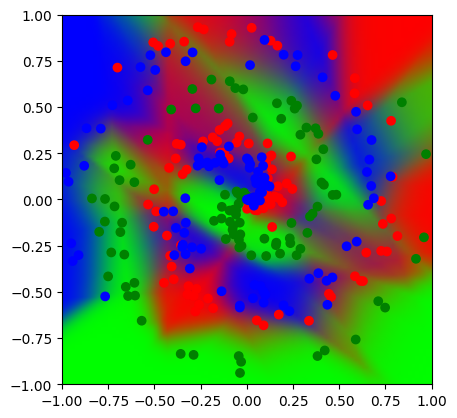

In [118]:
# SOL EJ 31b
nnfs.init()
X, y = spiral_data(samples=100, classes=3)


# Forward
dense1 = Layer_Dense(n_inputs=2, n_neurons=64)
relu = Activation_ReLU()

dense2 = Layer_Dense(n_inputs=64, n_neurons=3)

loss_softmax = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_RMSprop(decay=1e-4)

for epoch in range(10000):
  dense1.forward(X)
  relu.forward(dense1.output)

  dense2.forward(relu.output)
  loss = loss_softmax.forward(dense2.output, y)
  print(f"Loss: {loss}")

  #Backward
  loss_softmax.backward(loss_softmax.output, y)
  dense2.backward(loss_softmax.dinputs)
  relu.backward(dense2.dinputs)
  dense1.backward(relu.dinputs)

  optimizer.pre_update_params()
  optimizer.update_params(dense1)
  optimizer.update_params(dense2)
  optimizer.post_update_params()

model = [dense1, relu, dense2, loss_activation]
num_points = 100
plot_prediction_performance_spiral(model, X, y, num_points)

Loss: 1.098594307899475
Loss: 1.097968578338623
Loss: 1.0942323207855225
Loss: 1.218936562538147
Loss: 3.030198812484741
Loss: 1.307592749595642
Loss: 1.101733684539795
Loss: 1.0914667844772339
Loss: 1.0889441967010498
Loss: 1.0873583555221558
Loss: 1.086166501045227
Loss: 1.0853283405303955
Loss: 1.08473539352417
Loss: 1.0843168497085571
Loss: 1.084012508392334
Loss: 1.0837703943252563
Loss: 1.083574652671814
Loss: 1.083497166633606
Loss: 1.083410382270813
Loss: 1.083193302154541
Loss: 1.0831372737884521
Loss: 1.0828981399536133
Loss: 1.082811713218689
Loss: 1.0826821327209473
Loss: 1.0829927921295166
Loss: 1.0827754735946655
Loss: 1.0829277038574219
Loss: 1.0827571153640747
Loss: 1.0824640989303589
Loss: 1.0817791223526
Loss: 1.0814309120178223
Loss: 1.0806689262390137
Loss: 1.0794016122817993
Loss: 1.0782744884490967
Loss: 1.0773874521255493
Loss: 1.076779842376709
Loss: 1.077582597732544
Loss: 1.0839349031448364
Loss: 1.0789600610733032
Loss: 1.0783616304397583
Loss: 1.076575160026

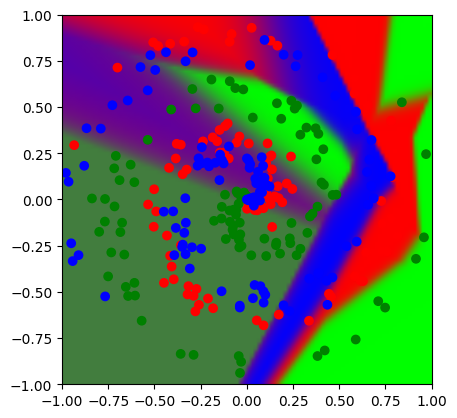

In [119]:
# SOL EJ 31b
nnfs.init()
X, y = spiral_data(samples=100, classes=3)


# Forward
dense1 = Layer_Dense(n_inputs=2, n_neurons=64)
relu = Activation_ReLU()

dense2 = Layer_Dense(n_inputs=64, n_neurons=3)

loss_softmax = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_RMSprop(learning_rate=0.02, decay=1e-5, rho=0.999)

for epoch in range(10000):
  dense1.forward(X)
  relu.forward(dense1.output)

  dense2.forward(relu.output)
  loss = loss_softmax.forward(dense2.output, y)
  print(f"Loss: {loss}")

  #Backward
  loss_softmax.backward(loss_softmax.output, y)
  dense2.backward(loss_softmax.dinputs)
  relu.backward(dense2.dinputs)
  dense1.backward(relu.dinputs)

  optimizer.pre_update_params()
  optimizer.update_params(dense1)
  optimizer.update_params(dense2)
  optimizer.post_update_params()

model = [dense1, relu, dense2, loss_activation]
num_points = 100
plot_prediction_performance_spiral(model, X, y, num_points)

## Ejercicio 32: Adam

 - **32.a** Partiendo de la clase que implementaste en el ejercicio anterior, programa una nueva clase llamada ```Optimizer_Adam``` que implemente este optimizador. Adam añade a RMSProp el mecanismo de momentum ($\beta_1$). También añade además un mecanismo de corrección de sesgo, dividiendo tanto el momentum como el caché por $1-\beta_1^{step}$.

In [120]:
# SOL EJ 32a -> completa las líneas con ######

# Adam optimizer
class Optimizer_Adam:

    # Initialize optimizer - set settings
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7, beta_1=0.9, beta_2=0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta_1 = beta_1  # momentum, and for the correction described above
        self.beta_2 = beta_2  # rename the old rho of RMSProp -> used for the cache

    def pre_update_params(self):
        ## SIN CAMBIOS - COPIA LA IMPLEMENTACIÓN QUE HICISTE EN EL EJERCICIO 29
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))


    def update_params(self, layer):

        if not hasattr(layer, 'weight_momentums'):  # Fixed the attribute name from 'weight_cache' to 'weight_momentums'
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.bias_cache = np.zeros_like(layer.biases)

        layer.weight_momentums = self.beta_1 * layer.weight_momentums + (1 - self.beta_1) * layer.dweights
        layer.bias_momentums = self.beta_2 * layer.bias_momentums + (1 - self.beta_2) * (layer.dbiases ** 2)

        weight_momentums_corrected = layer.weight_momentums / (1 - self.beta_1 ** (self.iterations + 1))
        bias_momentums_corrected = layer.bias_momentums / (1 - self.beta_2 ** (self.iterations + 1))
        weight_cache_corrected = layer.weight_cache / (1 - self.beta_1 ** (self.iterations + 1))  # Fixed attribute name from 'dweights' to 'weight_cache'
        bias_cache_corrected = layer.bias_cache / (1 - self.beta_2 ** (self.iterations + 1))  # Fixed attribute name from 'dbiases' to 'bias_cache'

        layer.weights += -self.current_learning_rate * weight_momentums_corrected / (np.sqrt(weight_cache_corrected + self.epsilon))
        layer.biases += -self.current_learning_rate * bias_momentums_corrected / (np.sqrt(bias_cache_corrected + self.epsilon))

        layer.weight_cache = self.beta_1 * layer.weight_cache + (1 - self.beta_1) * (layer.dweights ** 2)
        layer.bias_cache = self.beta_2 * layer.bias_cache + (1 - self.beta_2) * (layer.dbiases ** 2)

    def post_update_params(self):
        ## SIN CAMBIOS - COPIA LA IMPLEMENTACIÓN QUE HICISTE EN EL EJERCICIO 29
        self.iterations += 1

  - **32.b** Partiendo del código al que llegaste en el ejercicio 31, prueba el optimizador que acabas de implementar. Prueba primero con ```Optimizer_Adam(learning_rate=0.02, decay=1e-5)```, y luego con ```Optimizer_Adam(learning_rate=0.05, decay=5e-7)```. ¿Se consigue mejorar los resultados en comparación con los del ejercicio 31? Recuerda visiualizar los resultados como se explica en el ejercicio 27.

Loss: 1.098594307899475
Loss: 1.0981462001800537
Loss: 1.097126841545105
Loss: 1.095133662223816
Loss: 1.0922410488128662
Loss: 1.0888155698776245
Loss: 1.0853517055511475
Loss: 1.0823801755905151
Loss: 1.0803565979003906
Loss: 1.0794867277145386
Loss: 1.079580307006836
Loss: 1.0799977779388428
Loss: 1.0800846815109253
Loss: 1.0797039270401
Loss: 1.0790669918060303
Loss: 1.0784236192703247
Loss: 1.0778428316116333
Loss: 1.0774691104888916
Loss: 1.0773934125900269
Loss: 1.0775128602981567
Loss: 1.0776793956756592
Loss: 1.0777539014816284
Loss: 1.0776418447494507
Loss: 1.0773602724075317
Loss: 1.0770009756088257
Loss: 1.076690435409546
Loss: 1.0764260292053223
Loss: 1.0762208700180054
Loss: 1.0761109590530396
Loss: 1.0760794878005981
Loss: 1.0761171579360962
Loss: 1.0761207342147827
Loss: 1.0760432481765747
Loss: 1.0759299993515015
Loss: 1.0757912397384644
Loss: 1.0756690502166748
Loss: 1.075586199760437
Loss: 1.0755481719970703
Loss: 1.0755128860473633
Loss: 1.0754570960998535
Loss: 1.0

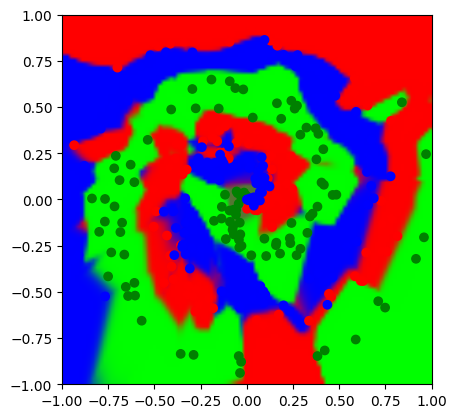

In [121]:
# SOL EJ 32b
nnfs.init()
X, y = spiral_data(samples=100, classes=3)


# Forward
dense1 = Layer_Dense(n_inputs=2, n_neurons=64)
relu = Activation_ReLU()

dense2 = Layer_Dense(n_inputs=64, n_neurons=3)

loss_softmax = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_Adam(learning_rate=0.02, decay=1e-5)

for epoch in range(10000):
  dense1.forward(X)
  relu.forward(dense1.output)

  dense2.forward(relu.output)
  loss = loss_softmax.forward(dense2.output, y)
  print(f"Loss: {loss}")

  #Backward
  loss_softmax.backward(loss_softmax.output, y)
  dense2.backward(loss_softmax.dinputs)
  relu.backward(dense2.dinputs)
  dense1.backward(relu.dinputs)

  optimizer.pre_update_params()
  optimizer.update_params(dense1)
  optimizer.update_params(dense2)
  optimizer.post_update_params()

model = [dense1, relu, dense2, loss_activation]
num_points = 100
plot_prediction_performance_spiral(model, X, y, num_points)

Loss: 1.098594307899475
Loss: 1.0974124670028687
Loss: 1.0890322923660278
Loss: 1.0808354616165161
Loss: 1.0807197093963623
Loss: 1.0803865194320679
Loss: 1.0787849426269531
Loss: 1.0777134895324707
Loss: 1.0776796340942383
Loss: 1.0779848098754883
Loss: 1.077500820159912
Loss: 1.0768581628799438
Loss: 1.0763397216796875
Loss: 1.0762441158294678
Loss: 1.0763148069381714
Loss: 1.076138973236084
Loss: 1.0757769346237183
Loss: 1.075472354888916
Loss: 1.0753765106201172
Loss: 1.0751947164535522
Loss: 1.0748567581176758
Loss: 1.0744340419769287
Loss: 1.0741559267044067
Loss: 1.0739333629608154
Loss: 1.073567271232605
Loss: 1.0731112957000732
Loss: 1.0726358890533447
Loss: 1.0721968412399292
Loss: 1.0716115236282349
Loss: 1.0710737705230713
Loss: 1.0705019235610962
Loss: 1.0698801279067993
Loss: 1.0693857669830322
Loss: 1.0699063539505005
Loss: 1.0755746364593506
Loss: 1.072721004486084
Loss: 1.0707194805145264
Loss: 1.0669808387756348
Loss: 1.069466233253479
Loss: 1.0687912702560425
Loss: 1

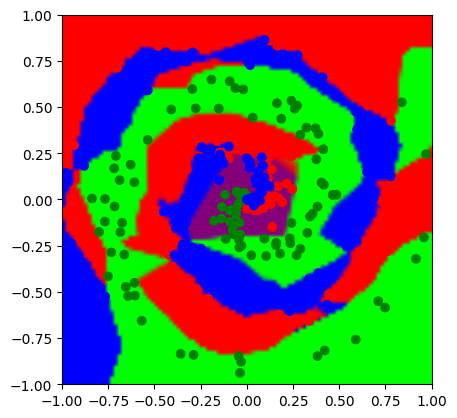

In [122]:
# SOL EJ 32b
nnfs.init()
X, y = spiral_data(samples=100, classes=3)


# Forward
dense1 = Layer_Dense(n_inputs=2, n_neurons=64)
relu = Activation_ReLU()

dense2 = Layer_Dense(n_inputs=64, n_neurons=3)

loss_softmax = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_Adam(learning_rate=0.05, decay=5e-7)

for epoch in range(10000):
  dense1.forward(X)
  relu.forward(dense1.output)

  dense2.forward(relu.output)
  loss = loss_softmax.forward(dense2.output, y)
  print(f"Loss: {loss}")

  #Backward
  loss_softmax.backward(loss_softmax.output, y)
  dense2.backward(loss_softmax.dinputs)
  relu.backward(dense2.dinputs)
  dense1.backward(relu.dinputs)

  optimizer.pre_update_params()
  optimizer.update_params(dense1)
  optimizer.update_params(dense2)
  optimizer.post_update_params()

model = [dense1, relu, dense2, loss_activation]
num_points = 100
plot_prediction_performance_spiral(model, X, y, num_points)

 - **32.c** Interpreta los resultados que acabas de obtener. ¿Crees que la red ha aprendido correctamente la naturaleza de los datos de entrenamiento? Si no es así, investiga qué puede estar pasando y discute posibles soluciones (no es necesario implementar nada).

In [123]:
# SOL EJ 32c
"""
Aunque la red realiza buenas estimaciones de los valores actuales de la espiral, no representa la mejor generalización posible. Esto se debe a que la espiral de cada color no se generaliza por completo, lo que significa que no es exacta. Esto es evidente en áreas como el rojo, que no sigue la espiral correctamente, y lo mismo ocurre con el verde, que interrumpe la espiral roja. El color azul también presenta este patrón. Además, en el centro, hay un color "morado" que parece indicar que la red no ha logrado generalizar ese área debido a la concentración de diferentes espirales.
"""

'\nAunque la red realice buenas estimaciones sobre los valores actuales de la espiral. Sin embargo, no es la mejor generalización que se\npuede conseguir, esto es debido a que la espiral de cada color no es generalizada, queriendo decir que no es exacta. Esto se puede apreciar en\nlugares como el rojo realizando su línea y el o el verde rompiendo esa espiral. Al igual pasa con el color azul. Por otro lado, sobre el centro,\nse encuentra un color "morado" que se puede interpretar como que no ha podido generalizar esa zona debido a la concentración de diferentes espirales.\n'

## Ejercicio 33: Regresión lineal

La estructura computacional que has creado permite abordar diversos problemas. En particular, permite por ejemplo obtener regresiones lineal múltiples con facilidad. En este ejercicio, calcularemos una. Trabajaremos con la base de datos ```diabetes```, contenida en ```sklearn```. Puedes cargar estos datos ejecutando la siguiente celda:

In [124]:
#%pip install -q scikit-learn
from sklearn import datasets

diabetes = datasets.load_diabetes()

X = diabetes['data']
y = diabetes['target'].reshape(-1, 1)  # Target Variable (y): A quantitative measure of disease progression one year after baseline.

Ahora, sigue el siguiente proceso para obtener la regresión multilineal que ajuste los datos:
 - **33.a** Las técnicas de regresión minimizan el error cuadrático medio. Programa una clase ```Loss_MeanSquaredError``` que implemente esta función de pérdidas. Recuerda implementar los métodos ```forward(self, y_pred, y_true)``` y ```backward(self, y_pred, y_true)```.


In [125]:
# SOL EJ 33a
class Loss_MeanSquaredError():
    # Forward pass
    def forward(self, y_pred, y_true):
        self.output = ((y_pred - y_true) ** 2).mean()

    # Backward pass
    def backward(self, y_pred, y_true):
        N = len(y_true)
        self.dinputs = 2 * (y_pred - y_true) / N

 - **33.b** Crea una red con la siguiente arquitectura:
    - Una única capa con ```n_inputs``` igual al número de variables predictoras y una única neurona. Sin función de activación (=función de activación lineal).
    - $MSE$ como función de pérdidas.
    - Optimizador de descenso de gradiente sin momentum ni *decay*. Comienza usando un *learning rate* de $0.05$.

In [126]:
# SOL EJ 33b

# Forward
dense1 = Layer_Dense(n_inputs=X.shape[1], n_neurons=1)
loss_RMSE = Loss_MeanSquaredError()
optimizer = Optimizer_SGD(learning_rate=.05)

dense1.forward(X)
loss_RMSE.forward(dense1.output, y)

print(f"Loss: {loss_RMSE.output}")
#Backward
loss_RMSE.backward(dense1.output, y)
dense1.backward(loss_RMSE.dinputs)

optimizer.pre_update_params()
optimizer.update_params(dense1)
optimizer.post_update_params()

Loss: 29074.469643754208


: - **33.c** Realiza el entrenamiento en $10000$ *epochs*. Comprueba que las pérdidas medias se van reduciendo.

Loss: 29074.378964631276
Loss: 24672.992761079277
Loss: 21107.133034690953
Loss: 18218.050870346327
Loss: 15877.159528428545
Loss: 13980.303615816993
Loss: 12443.11769650622
Loss: 11197.26626695329
Loss: 10187.396978272343
Loss: 9368.673680872409
Loss: 8704.780986714186
Loss: 8166.30130694053
Loss: 7729.407515505198
Loss: 7374.799390940388
Loss: 7086.84410576776
Loss: 6852.878694532077
Loss: 6662.646019555674
Loss: 6507.838348926559
Loss: 6381.72598806267
Loss: 6278.857516070196
Loss: 6194.818384817955
Loss: 6126.031907174317
Loss: 6069.601455236738
Loss: 6023.18026151129
Loss: 5984.868091388426
Loss: 5953.125017318993
Loss: 5926.704168000579
Loss: 5904.595542148867
Loss: 5885.980786446859
Loss: 5870.19738083589
Loss: 5856.708448843683
Loss: 5845.079202089031
Loss: 5834.957448575755
Loss: 5826.057689603862
Loss: 5818.149182935096
Loss: 5811.04457603986
Loss: 5804.592326634768
Loss: 5798.669558901622
Loss: 5793.176784659013
Loss: 5788.0333956580025
Loss: 5783.174161742576
Loss: 5778.546

Loss: 4807.652760838018
Loss: 4805.514203782486
Loss: 4803.378843871539
Loss: 4801.246807176788
Loss: 4799.117889909069
Loss: 4796.992272433601
Loss: 4794.869880857813
Loss: 4792.750788769267
Loss: 4790.6349069746
Loss: 4788.522206136252
Loss: 4786.412680157928
Loss: 4784.3064598798965
Loss: 4782.203425925631
Loss: 4780.103520946204
Loss: 4778.0068960352155
Loss: 4775.913356325797
Loss: 4773.823080562687
Loss: 4771.7359133712835
Loss: 4769.65190269035
Loss: 4767.57102135815
Loss: 4765.493447910851
Loss: 4763.418905951909
Loss: 4761.347585608683
Loss: 4759.279387213515
Loss: 4757.21432592398
Loss: 4755.152396865568
Loss: 4753.093519293438
Loss: 4751.037807019816
Loss: 4748.98524790094
Loss: 4746.93578264628
Loss: 4744.889392977289
Loss: 4742.846095231265
Loss: 4740.80587704159
Loss: 4738.768773463942
Loss: 4736.734746471997
Loss: 4734.7038449765805
Loss: 4732.675903788594
Loss: 4730.651059444421
Loss: 4728.62931681272
Loss: 4726.610618563356
Loss: 4724.59497098131
Loss: 4722.58240757419

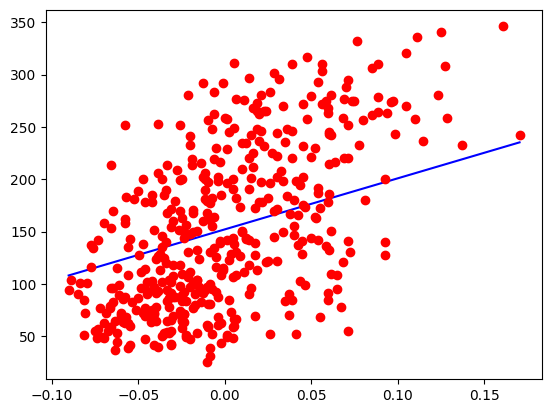

In [127]:
# Sol EJ 33c

# Forward
dense1 = Layer_Dense(n_inputs=X.shape[1], n_neurons=1)
loss_RMSE = Loss_MeanSquaredError()
optimizer = Optimizer_SGD(learning_rate=.05)

for epoch in range(10000):
  dense1.forward(X)
  loss_RMSE.forward(dense1.output, y)

  print(f"Loss: {loss_RMSE.output}")
  #Backward
  loss_RMSE.backward(dense1.output, y)
  dense1.backward(loss_RMSE.dinputs)

  optimizer.pre_update_params()
  optimizer.update_params(dense1)
  optimizer.post_update_params()


#Comprueba también que la función obtenida sigue la tendencia lineal de los datos en alguna de las variables. Puedes adaptar el siguiente bloque de código para hacerlo
var_num = 2

x_points = np.linspace(min(X[:, np.newaxis, var_num]), max(X[:, np.newaxis, var_num]), 100)
y_points = dense1.biases.flatten() + dense1.weights[var_num] * x_points

plt.plot(x_points, y_points, 'b')
plt.plot(X[:, np.newaxis, var_num], y, 'ro')